# English Premiere League 15-21

## Objective: Predict Any Match Result In This Dataset
#### - Combine all 6 datasets into 1 dataset
#### - Extract useful features for the model
#### - Add new features from existing data
#### - Use accumulated features as the model will predict any match in the dataset 
#### - Build a model that will predict the match results of any given match
#### - Reach an accuracy of 60% or higher

## Imports

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Datasets import and concatenation

In [2]:
epl_15_16_matches = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (1)/football_prediction-main/england-premier-league-matches-2015-to-2016-stats.csv')
epl_16_17_matches = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (1)/football_prediction-main/england-premier-league-matches-2016-to-2017-stats.csv')
epl_17_18_matches = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (1)/football_prediction-main/england-premier-league-matches-2017-to-2018-stats.csv')
epl_18_19_matches = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (1)/football_prediction-main/england-premier-league-matches-2018-to-2019-stats.csv')
epl_19_20_matches = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (1)/football_prediction-main/england-premier-league-matches-2019-to-2020-stats.csv')
epl_20_21_matches = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (1)/football_prediction-main/england-premier-league-matches-2020-to-2021-stats.csv')
epl_21_22_matches = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (1)/football_prediction-main/england-premier-league-matches-2021-to-2022-stats.csv')

In [3]:
epl_15_20_matches = pd.concat([epl_15_16_matches, epl_16_17_matches, 
                               epl_17_18_matches,epl_18_19_matches, epl_19_20_matches,
                               epl_20_21_matches], axis=0)

In [4]:
epl_15_20_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 379
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            2280 non-null   int64  
 1   date_GMT                             2280 non-null   object 
 2   status                               2280 non-null   object 
 3   attendance                           2167 non-null   float64
 4   home_team_name                       2280 non-null   object 
 5   away_team_name                       2280 non-null   object 
 6   referee                              1545 non-null   object 
 7   Game Week                            2280 non-null   int64  
 8   Pre-Match PPG (Home)                 2280 non-null   float64
 9   Pre-Match PPG (Away)                 2280 non-null   float64
 10  home_ppg                             2280 non-null   float64
 11  away_ppg                       

## Resting index for the whole dataset after joining all 6 datasets into 1

In [5]:
epl_15_20_matches.reset_index(drop=True, inplace=True)

## Match result extraction based on the home and away goal count

In [6]:
conditions = [
    (epl_15_20_matches['home_team_goal_count'] == epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] > epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] < epl_15_20_matches['away_team_goal_count'])
]

# create a list of the values we want to assign for each condition
values = ['D', 'H', 'A']
home_values = ['D','W','L']
away_values = ['D','L','W']
home_points = [1,3,0]
away_points = [1,0,3]
values2 = [0, 1, -1]

# create a 2 new columns for match results,
# numerical coulumn (0 => Draw, 1 => Home Win, -1 => Home Lose)
# text column (H => Home, D => Draw, A => Away)
epl_15_20_matches['match_result_txt'] = np.select(conditions, values)
epl_15_20_matches['match_result_num'] = np.select(conditions, values2)
epl_15_20_matches['match_home_result'] = np.select(conditions, home_values)
epl_15_20_matches['match_away_result'] = np.select(conditions, away_values)
epl_15_20_matches['home_points_result'] = np.select(conditions, home_points)
epl_15_20_matches['away_points_result'] = np.select(conditions, away_points)
epl_15_20_matches = pd.get_dummies(epl_15_20_matches, columns=['match_result_txt'], prefix="result")

epl_15_20_matches['match_result_txt'] = np.select(conditions, values)
epl_15_20_matches[['home_team_name','away_team_name','home_team_goal_count','away_team_goal_count','match_home_result','match_away_result','match_result_txt','home_points_result','away_points_result','result_H','result_A']].head(20)

,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,match_home_result,match_away_result,match_result_txt,home_points_result,away_points_result,result_H,result_A
0,Manchester United,Tottenham Hotspur,1,0,W,L,H,3,0,1,0
1,AFC Bournemouth,Aston Villa,0,1,L,W,A,0,3,0,1
2,Norwich City,Crystal Palace,1,3,L,W,A,0,3,0,1
3,Leicester City,Sunderland,4,2,W,L,H,3,0,1,0
4,Everton,Watford,2,2,D,D,D,1,1,0,0
5,Chelsea,Swansea City,2,2,D,D,D,1,1,0,0
6,Newcastle United,Southampton,2,2,D,D,D,1,1,0,0
7,Arsenal,West Ham United,0,2,L,W,A,0,3,0,1
8,Stoke City,Liverpool,0,1,L,W,A,0,3,0,1
9,West Bromwich Albion,Manchester City,0,3,L,W,A,0,3,0,1


## Analysis that shows that home teams have the advantage of winning a match

Text(0.5, 1.0, 'Match Result')

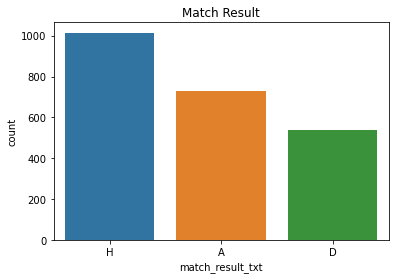

In [7]:
# A count plot to show that macthes mostly result with home wins
sns.countplot(x="match_result_txt", data=epl_15_20_matches)
plt.title('Match Result')

# Adding new features

## Creating season column based on year and month of match played

In [8]:
# Extract year and month from kick off time => to generate season column
epl_15_20_matches['year'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).year
epl_15_20_matches['month'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).month

In [9]:
# Adding new columns to generate the corresponding seasons for each match
epl_15_20_matches['year_add'] = epl_15_20_matches['year'] + 1
epl_15_20_matches['year_minus'] = epl_15_20_matches['year'] - 1
epl_15_20_matches['slash'] = '/'
epl_15_20_matches['season_add'] = epl_15_20_matches['year'].astype(str) + epl_15_20_matches['slash'] +  epl_15_20_matches['year_add'].astype(str)
epl_15_20_matches['season_minus'] = epl_15_20_matches['year_minus'].astype(str) + epl_15_20_matches['slash'] +  epl_15_20_matches['year'].astype(str)

In [10]:
# Creating season based on the date of the match
epl_15_20_matches['season'] = np.where(epl_15_20_matches['month'] >= 8, 
                                       epl_15_20_matches['season_add'],
                                       epl_15_20_matches['season_minus'])

In [11]:
# Dropping the columns used for generating the season column
epl_15_20_matches.drop(['year_add','year_minus','slash','season_add','season_minus'], axis=1, inplace=True)

In [12]:
epl_15_20_matches[['year','month','season']].head()

,year,month,season
0,2015,8,2015/2016
1,2015,8,2015/2016
2,2015,8,2015/2016
3,2015,8,2015/2016
4,2015,8,2015/2016


## Head to Head Feature Extraction (Accumulated)

In [13]:
epl_15_20_matches_head_home = epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','result_H','result_A']]
epl_15_20_matches_head_away = epl_15_20_matches[['season','Game Week','away_team_name','home_team_name','result_A','result_H']]

epl_15_20_matches_head_home.rename(columns={"home_team_name": "home_team"}, inplace = True)
epl_15_20_matches_head_home.rename(columns={"away_team_name": "away_team"}, inplace = True)
epl_15_20_matches_head_home.rename(columns={"result_H": "result_home"}, inplace = True)
epl_15_20_matches_head_home.rename(columns={"result_A": "result_away"}, inplace = True)
epl_15_20_matches_head_away.rename(columns={"away_team_name": "home_team"}, inplace = True)
epl_15_20_matches_head_away.rename(columns={"home_team_name": "away_team"}, inplace = True)
epl_15_20_matches_head_away.rename(columns={"result_A": "result_home"}, inplace = True)
epl_15_20_matches_head_away.rename(columns={"result_H": "result_away"}, inplace = True)

epl_15_20_matches_head_total = pd.concat([epl_15_20_matches_head_home, epl_15_20_matches_head_away], axis=0)
epl_15_20_matches_head_total = epl_15_20_matches_head_total.sort_values(by=['season','Game Week'])

epl_15_20_matches_head_total['MP_Teams'] = epl_15_20_matches_head_total.groupby(['home_team','away_team']).cumcount()

epl_15_20_matches_head_total[['head_D','home_head','away_head','head_D2']] = epl_15_20_matches_head_total.groupby(['home_team','away_team']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_matches_head_total.drop(['head_D','head_D2'], axis=1, inplace=True)

#epl_15_20_matches_head_total.to_csv('head.csv',index=False)

epl_15_20_matches_head_total.head(10)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,season,Game Week,home_team,away_team,result_home,result_away,MP_Teams,home_head,away_head
0,2015/2016,1,Manchester United,Tottenham Hotspur,1,0,0,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,1,0,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,1,0,0,0
3,2015/2016,1,Leicester City,Sunderland,1,0,0,0,0
4,2015/2016,1,Everton,Watford,0,0,0,0,0
5,2015/2016,1,Chelsea,Swansea City,0,0,0,0,0
6,2015/2016,1,Newcastle United,Southampton,0,0,0,0,0
7,2015/2016,1,Arsenal,West Ham United,0,1,0,0,0
8,2015/2016,1,Stoke City,Liverpool,0,1,0,0,0
9,2015/2016,1,West Bromwich Albion,Manchester City,0,1,0,0,0


In [14]:
epl_15_20_matches_head_total.rename(columns={"home_team": "home_team_name"}, inplace = True)
epl_15_20_matches_head_total.rename(columns={"away_team": "away_team_name"}, inplace = True)

epl_15_20_matches_head_total = epl_15_20_matches_head_total[['season','Game Week','home_team_name','away_team_name',
                                                            'MP_Teams','home_head','away_head']]
epl_15_20_matches_home_join = epl_15_20_matches.merge(epl_15_20_matches_head_total, 
                                how='left',
                                on=['season','Game Week','home_team_name','away_team_name'])

epl_15_20_matches = epl_15_20_matches_home_join
epl_15_20_matches['head_diff'] = epl_15_20_matches['home_head'] - epl_15_20_matches['away_head']
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','MP_Teams','home_head','away_head']].head(5)

,season,Game Week,home_team_name,away_team_name,MP_Teams,home_head,away_head
0,2015/2016,1,Manchester United,Tottenham Hotspur,0,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,0,0
3,2015/2016,1,Leicester City,Sunderland,0,0,0
4,2015/2016,1,Everton,Watford,0,0,0


## Win/Lose Rate Features Extraction (Accumulated)

In [15]:
epl_15_20_matches['home_vs_away_win_rate'] = epl_15_20_matches['home_head'].div(epl_15_20_matches['MP_Teams']).replace(np.inf, 0)
epl_15_20_matches['home_vs_away_lose_rate'] = epl_15_20_matches['away_head'].div(epl_15_20_matches['MP_Teams']).replace(np.inf, 0)

epl_15_20_matches['home_vs_away_win_rate'] = epl_15_20_matches['home_vs_away_win_rate'].fillna(0)
epl_15_20_matches['home_vs_away_lose_rate'] = epl_15_20_matches['home_vs_away_lose_rate'].fillna(0)

#epl_15_20_matches['home_vs_away_win_rate'] = epl_15_20_matches['home_vs_away_win_rate'] * 100
#epl_15_20_matches['home_vs_away_lose_rate'] = epl_15_20_matches['home_vs_away_lose_rate'] * 100

## Matches Played Total (Before Match) 15-21 Feature Extraction 
#### Note: This can only happen in a live season, as matches are postponed and some teams play more or less than others.

In [16]:
# Number of wins for each team in the past 5 years
# Number of loses for each team in the past 5 years 
# Number of draws for each team in the past 5 years
# Win Rate for each team
# Loss Rate for each team
# Draw Rate for each team

# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match

epl_15_20_matches_played_home = epl_15_20_matches[['season','Game Week','home_team_name']]
epl_15_20_matches_played_away = epl_15_20_matches[['season','Game Week','away_team_name']]

epl_15_20_matches_played_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_played_away.rename(columns={"away_team_name": "team_name"}, inplace = True)

epl_15_20_matches_played_total = pd.concat([epl_15_20_matches_played_home, epl_15_20_matches_played_away], axis=0)
epl_15_20_matches_played_total = epl_15_20_matches_played_total.sort_values(by=['season','team_name','Game Week'])

# MPBM (Matches Played Before Match)
epl_15_20_matches_played_total['MPTBM'] = epl_15_20_matches_played_total.groupby(['team_name']).cumcount()

epl_15_20_matches_played_total.head(5)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,season,Game Week,team_name,MPTBM
1,2015/2016,1,AFC Bournemouth,0
19,2015/2016,2,AFC Bournemouth,1
22,2015/2016,3,AFC Bournemouth,2
32,2015/2016,4,AFC Bournemouth,3
41,2015/2016,5,AFC Bournemouth,4


In [17]:
# For the method of calculating the matches played for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the MPBM for home and away teams
epl_15_20_matches_home = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_home.rename(columns={"MPTBM": "MPTBM_H"}, inplace = True)
epl_15_20_matches_home = epl_15_20_matches_home[['season','Game Week','home_team_name','MPTBM_H']]

epl_15_20_matches_away = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_away.rename(columns={"MPTBM": "MPTBM_A"}, inplace = True)
epl_15_20_matches_away = epl_15_20_matches_away[['season','Game Week','away_team_name','MPTBM_A']]

epl_15_20_matches_home_join = epl_15_20_matches.merge(epl_15_20_matches_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_matches_home_join = epl_15_20_matches_home_join.merge(epl_15_20_matches_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_matches_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','MPTBM_H','MPTBM_A']].head(5)

,season,Game Week,home_team_name,away_team_name,MPTBM_H,MPTBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,0
3,2015/2016,1,Leicester City,Sunderland,0,0
4,2015/2016,1,Everton,Watford,0,0


## Matches Played (Before Match) Per Season Feature Extraction

In [18]:
# This part is to generate a column for the matches played for each team before the match
# On previous seasons there is no possibilty for the rows to have different value 
# This method is used to generate this column for future matches as there is a posibility that teams facing each other 
# may differ in their matches played

epl_15_20_matches_played_home = epl_15_20_matches[['season','Game Week','home_team_name']]
epl_15_20_matches_played_away = epl_15_20_matches[['season','Game Week','away_team_name']]

epl_15_20_matches_played_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_played_away.rename(columns={"away_team_name": "team_name"}, inplace = True)

epl_15_20_matches_played_total = pd.concat([epl_15_20_matches_played_home, epl_15_20_matches_played_away], axis=0)
epl_15_20_matches_played_total = epl_15_20_matches_played_total.sort_values(by=['season','team_name','Game Week'])

# MPBM (Matches Played Before Match)
epl_15_20_matches_played_total['MPBM'] = epl_15_20_matches_played_total.groupby(['season','team_name']).cumcount()

epl_15_20_matches_played_total.head(5)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,season,Game Week,team_name,MPBM
1,2015/2016,1,AFC Bournemouth,0
19,2015/2016,2,AFC Bournemouth,1
22,2015/2016,3,AFC Bournemouth,2
32,2015/2016,4,AFC Bournemouth,3
41,2015/2016,5,AFC Bournemouth,4


In [19]:
# For the method of calculating the matches played for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the MPBM for home and away teams
epl_15_20_matches_home = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_home.rename(columns={"MPBM": "MPBM_H"}, inplace = True)
epl_15_20_matches_home = epl_15_20_matches_home[['season','Game Week','home_team_name','MPBM_H']]

epl_15_20_matches_away = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_away.rename(columns={"MPBM": "MPBM_A"}, inplace = True)
epl_15_20_matches_away = epl_15_20_matches_away[['season','Game Week','away_team_name','MPBM_A']]

epl_15_20_matches_home_join = epl_15_20_matches.merge(epl_15_20_matches_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_matches_home_join = epl_15_20_matches_home_join.merge(epl_15_20_matches_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_matches_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','MPBM_H','MPBM_A']].head(20)

,season,Game Week,home_team_name,away_team_name,MPBM_H,MPBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,0
3,2015/2016,1,Leicester City,Sunderland,0,0
4,2015/2016,1,Everton,Watford,0,0
5,2015/2016,1,Chelsea,Swansea City,0,0
6,2015/2016,1,Newcastle United,Southampton,0,0
7,2015/2016,1,Arsenal,West Ham United,0,0
8,2015/2016,1,Stoke City,Liverpool,0,0
9,2015/2016,1,West Bromwich Albion,Manchester City,0,0


## Shows that past seasons dataset will not have teams that did not play the same number of matches before a match

In [20]:
# Here is to show that the current datasets already has no row showing difference in matches between the home and away teams
epl_15_20_matches[epl_15_20_matches.MPBM_H != epl_15_20_matches.MPBM_A].head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,MP_Teams,home_head,away_head,head_diff,home_vs_away_win_rate,home_vs_away_lose_rate,MPTBM_H,MPTBM_A,MPBM_H,MPBM_A


## Points Per Season (Before Match) Per Season Feature Extraction

In [21]:
epl_15_20_points_home = epl_15_20_matches[['season','Game Week','home_team_name','home_points_result']]
epl_15_20_points_away = epl_15_20_matches[['season','Game Week','away_team_name','away_points_result']]

epl_15_20_points_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_points_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_points_home.rename(columns={"home_points_result": "points_result"}, inplace = True)
epl_15_20_points_away.rename(columns={"away_points_result": "points_result"}, inplace = True)

epl_15_20_points_total = pd.concat([epl_15_20_points_home, epl_15_20_points_away], axis=0)
epl_15_20_points_total = epl_15_20_points_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_points_total[['points_result_D','points_result']] = epl_15_20_points_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_points_total.drop('points_result_D', axis=1, inplace=True)

epl_15_20_points_total.head(5)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,season,Game Week,team_name,points_result
1,2015/2016,1,AFC Bournemouth,0.0
19,2015/2016,2,AFC Bournemouth,0.0
22,2015/2016,3,AFC Bournemouth,0.0
32,2015/2016,4,AFC Bournemouth,3.0
41,2015/2016,5,AFC Bournemouth,4.0


In [22]:
epl_15_20_points_home = epl_15_20_matches.merge(epl_15_20_points_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_points_home.rename(columns={"points_result": "points_H"}, inplace = True)

epl_15_20_points_home = epl_15_20_points_home[['season','Game Week','home_team_name','points_H']]

epl_15_20_points_away = epl_15_20_matches.merge(epl_15_20_points_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_points_away.rename(columns={"points_result": "points_A"}, inplace = True)
epl_15_20_points_away = epl_15_20_points_away[['season','Game Week','away_team_name','points_A']]

epl_15_20_points_home_join = epl_15_20_matches.merge(epl_15_20_points_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_points_home_join = epl_15_20_points_home_join.merge(epl_15_20_points_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_points_home_join

epl_15_20_matches['cum_points_diff'] = epl_15_20_matches['points_H'] - epl_15_20_matches['points_A']
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','points_H','points_A','cum_points_diff']].head(10)

,season,Game Week,home_team_name,away_team_name,points_H,points_A,cum_points_diff
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0,0.0
5,2015/2016,1,Chelsea,Swansea City,0.0,0.0,0.0
6,2015/2016,1,Newcastle United,Southampton,0.0,0.0,0.0
7,2015/2016,1,Arsenal,West Ham United,0.0,0.0,0.0
8,2015/2016,1,Stoke City,Liverpool,0.0,0.0,0.0
9,2015/2016,1,West Bromwich Albion,Manchester City,0.0,0.0,0.0


## Goals For / Goals Againt (Before Match) Per Season Feature Extraction

In [23]:
# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match
epl_15_20_matches_goals_home = epl_15_20_matches[['season','Game Week','home_team_name','home_team_goal_count','away_team_goal_count']]
epl_15_20_matches_goals_away = epl_15_20_matches[['season','Game Week','away_team_name','away_team_goal_count','home_team_goal_count']]

epl_15_20_matches_goals_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_matches_goals_home.rename(columns={"home_team_goal_count": "team_goals_for"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"away_team_goal_count": "team_goals_for"}, inplace = True)
epl_15_20_matches_goals_home.rename(columns={"away_team_goal_count": "team_goals_against"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"home_team_goal_count": "team_goals_against"}, inplace = True)

epl_15_20_matches_goals_total = pd.concat([epl_15_20_matches_goals_home, epl_15_20_matches_goals_away], axis=0)
epl_15_20_matches_goals_total = epl_15_20_matches_goals_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_matches_goals_total[['GSBM_D','GSBM_FR','GSBM_AG']] = epl_15_20_matches_goals_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_matches_goals_total.drop('GSBM_D', axis=1, inplace=True)

epl_15_20_matches_goals_total.head(5)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,season,Game Week,team_name,team_goals_for,team_goals_against,GSBM_FR,GSBM_AG
1,2015/2016,1,AFC Bournemouth,0,1,0.0,0.0
19,2015/2016,2,AFC Bournemouth,0,1,0.0,1.0
22,2015/2016,3,AFC Bournemouth,4,3,0.0,2.0
32,2015/2016,4,AFC Bournemouth,1,1,4.0,5.0
41,2015/2016,5,AFC Bournemouth,1,3,5.0,6.0


In [24]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_goals_home = epl_15_20_matches.merge(epl_15_20_matches_goals_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_goals_home.rename(columns={"GSBM_FR": "GSBM_H_FR"}, inplace = True)
epl_15_20_goals_home.rename(columns={"GSBM_AG": "GSBM_H_AG"}, inplace = True)

epl_15_20_goals_home = epl_15_20_goals_home[['season','Game Week','home_team_name','GSBM_H_FR','GSBM_H_AG']]

epl_15_20_goals_away = epl_15_20_matches.merge(epl_15_20_matches_goals_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_goals_away.rename(columns={"GSBM_FR": "GSBM_A_FR"}, inplace = True)
epl_15_20_goals_away.rename(columns={"GSBM_AG": "GSBM_A_AG"}, inplace = True)
epl_15_20_goals_away = epl_15_20_goals_away[['season','Game Week','away_team_name','GSBM_A_FR','GSBM_A_AG']]

epl_15_20_goals_home_join = epl_15_20_matches.merge(epl_15_20_goals_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_goals_home_join = epl_15_20_goals_home_join.merge(epl_15_20_goals_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_goals_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','GSBM_H_FR','GSBM_H_AG','GSBM_A_FR','GSBM_A_AG']].head(5)

,season,Game Week,home_team_name,away_team_name,GSBM_H_FR,GSBM_H_AG,GSBM_A_FR,GSBM_A_AG
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0,0.0,0.0


In [25]:
# GDBM (Goals Difference Before Match)
epl_15_20_matches['GDBM_H'] = epl_15_20_matches['GSBM_H_FR'] - epl_15_20_matches['GSBM_H_AG']
epl_15_20_matches['GDBM_A'] = epl_15_20_matches['GSBM_A_FR'] - epl_15_20_matches['GSBM_A_AG']

# Goals difference between both home and away teams' goal difference
epl_15_20_matches['goals_diff'] = epl_15_20_matches['GDBM_H'] - epl_15_20_matches['GDBM_A']

## Shots on Target (Before Match) Per Season Feature Extraction

In [26]:
# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match
epl_15_20_shots_on_home = epl_15_20_matches[['season','Game Week','home_team_name','home_team_shots_on_target']]
epl_15_20_shots_on_away = epl_15_20_matches[['season','Game Week','away_team_name','away_team_shots_on_target']]

epl_15_20_shots_on_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_shots_on_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_shots_on_home.rename(columns={"home_team_shots_on_target": "shots_on"}, inplace = True)
epl_15_20_shots_on_away.rename(columns={"away_team_shots_on_target": "shots_on"}, inplace = True)

epl_15_20_shots_on_total = pd.concat([epl_15_20_shots_on_home, epl_15_20_shots_on_away], axis=0)
epl_15_20_shots_on_total = epl_15_20_shots_on_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_shots_on_total[['SOTBM_D','SOTBM']] = epl_15_20_shots_on_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_shots_on_total.drop('SOTBM_D', axis=1, inplace=True)

epl_15_20_shots_on_total.head(5)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,season,Game Week,team_name,shots_on,SOTBM
1,2015/2016,1,AFC Bournemouth,3,0.0
19,2015/2016,2,AFC Bournemouth,4,3.0
22,2015/2016,3,AFC Bournemouth,5,7.0
32,2015/2016,4,AFC Bournemouth,2,12.0
41,2015/2016,5,AFC Bournemouth,0,14.0


In [27]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_shots_home = epl_15_20_matches.merge(epl_15_20_shots_on_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_shots_home.rename(columns={"SOTBM": "SOTBM_H"}, inplace = True)

epl_15_20_shots_home = epl_15_20_shots_home[['season','Game Week','home_team_name','SOTBM_H']]

epl_15_20_shots_away = epl_15_20_matches.merge(epl_15_20_shots_on_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_shots_away.rename(columns={"SOTBM": "SOTBM_A"}, inplace = True)
epl_15_20_shots_away = epl_15_20_shots_away[['season','Game Week','away_team_name','SOTBM_A']]

epl_15_20_shots_home_join = epl_15_20_matches.merge(epl_15_20_shots_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_shots_home_join = epl_15_20_shots_home_join.merge(epl_15_20_shots_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_shots_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','SOTBM_H','SOTBM_A']].head(5)

,season,Game Week,home_team_name,away_team_name,SOTBM_H,SOTBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0


In [28]:
# Redcards difference between both home and away teams' redcard difference
epl_15_20_matches['shots_on_diff'] = epl_15_20_matches['SOTBM_H'] - epl_15_20_matches['SOTBM_A']

## Expected Goals (Before Match) Per Season Feature Extraction

In [29]:
# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the expected goals for and the goals against for each team 
# We will calculate those columns and will get the expected goal difference for each team before playing the match
epl_15_20_xg_home = epl_15_20_matches[['season','Game Week','home_team_name','team_a_xg']]
epl_15_20_xg_away = epl_15_20_matches[['season','Game Week','away_team_name','team_b_xg']]

epl_15_20_xg_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_xg_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_xg_home.rename(columns={"team_a_xg": "xg"}, inplace = True)
epl_15_20_xg_away.rename(columns={"team_b_xg": "xg"}, inplace = True)

epl_15_20_xg_total = pd.concat([epl_15_20_xg_home, epl_15_20_xg_away], axis=0)
epl_15_20_xg_total = epl_15_20_xg_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_xg_total[['XGBM_D','XGBM']] = epl_15_20_xg_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_xg_total.drop('XGBM_D', axis=1, inplace=True)

epl_15_20_xg_total.head(5)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,season,Game Week,team_name,xg,XGBM
1,2015/2016,1,AFC Bournemouth,0.0,0.0
19,2015/2016,2,AFC Bournemouth,0.0,0.0
22,2015/2016,3,AFC Bournemouth,0.0,0.0
32,2015/2016,4,AFC Bournemouth,0.0,0.0
41,2015/2016,5,AFC Bournemouth,0.0,0.0


In [30]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_xgs_home = epl_15_20_matches.merge(epl_15_20_xg_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_xgs_home.rename(columns={"XGBM": "XGBM_H"}, inplace = True)

epl_15_20_xgs_home = epl_15_20_xgs_home[['season','Game Week','home_team_name','XGBM_H']]

epl_15_20_xgs_away = epl_15_20_matches.merge(epl_15_20_xg_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_xgs_away.rename(columns={"XGBM": "XGBM_A"}, inplace = True)
epl_15_20_xgs_away = epl_15_20_xgs_away[['season','Game Week','away_team_name','XGBM_A']]

epl_15_20_xgs_home_join = epl_15_20_matches.merge(epl_15_20_xgs_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_xgs_home_join = epl_15_20_xgs_home_join.merge(epl_15_20_xgs_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_xgs_home_join

epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','XGBM_H','XGBM_A']].head(10)

,season,Game Week,home_team_name,away_team_name,XGBM_H,XGBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0
5,2015/2016,1,Chelsea,Swansea City,0.0,0.0
6,2015/2016,1,Newcastle United,Southampton,0.0,0.0
7,2015/2016,1,Arsenal,West Ham United,0.0,0.0
8,2015/2016,1,Stoke City,Liverpool,0.0,0.0
9,2015/2016,1,West Bromwich Albion,Manchester City,0.0,0.0


In [31]:
epl_15_20_matches['xg_diff'] = epl_15_20_matches['XGBM_H'] - epl_15_20_matches['XGBM_A']

## Team Form (Before Match) Per Season Feature Extraction
#### - Trying to calculate the form of the team from past 3 matches 

In [32]:
epl_15_20_result_home = epl_15_20_matches[['home_team_name','MPTBM_H','match_home_result']]
epl_15_20_result_away = epl_15_20_matches[['away_team_name','MPTBM_A','match_away_result']]

epl_15_20_result_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_result_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_result_home.rename(columns={"match_home_result": "team_result"}, inplace = True)
epl_15_20_result_away.rename(columns={"match_away_result": "team_result"}, inplace = True)
epl_15_20_result_home.rename(columns={"MPTBM_H": "MPTBM"}, inplace = True)
epl_15_20_result_away.rename(columns={"MPTBM_A": "MPTBM"}, inplace = True)

epl_15_20_result_total = pd.concat([epl_15_20_result_home, epl_15_20_result_away], axis=0)
epl_15_20_result_total = epl_15_20_result_total.sort_values(by=['team_name','MPTBM'])

epl_15_20_result_total.head(10)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,team_name,MPTBM,team_result
1,AFC Bournemouth,0,L
19,AFC Bournemouth,1,L
22,AFC Bournemouth,2,W
32,AFC Bournemouth,3,D
41,AFC Bournemouth,4,L
53,AFC Bournemouth,5,W
63,AFC Bournemouth,6,L
74,AFC Bournemouth,7,D
82,AFC Bournemouth,8,L
98,AFC Bournemouth,9,L


In [33]:
epl_15_20_result_total['team_last_1_result'] = epl_15_20_result_total.groupby(['team_name'])['team_result'].shift(1)
epl_15_20_result_total['team_last_2_result'] = epl_15_20_result_total.groupby(['team_name'])['team_result'].shift(2)
epl_15_20_result_total['team_last_3_result'] = epl_15_20_result_total.groupby(['team_name'])['team_result'].shift(3)

epl_15_20_result_total.head()

,team_name,MPTBM,team_result,team_last_1_result,team_last_2_result,team_last_3_result
1,AFC Bournemouth,0,L,NaN,NaN,NaN
19,AFC Bournemouth,1,L,L,NaN,NaN
22,AFC Bournemouth,2,W,L,L,NaN
32,AFC Bournemouth,3,D,W,L,L
41,AFC Bournemouth,4,L,D,W,L


In [34]:
epl_15_20_result_total['team_last_1_result_value'] = np.select([(epl_15_20_result_total['team_last_1_result'] == 'W'),
                                                                (epl_15_20_result_total['team_last_1_result'] == 'L'),
                                                                (epl_15_20_result_total['team_last_1_result'] == 'D')], 
                                                                [3,0,1])
epl_15_20_result_total['team_last_2_result_value'] = np.select([(epl_15_20_result_total['team_last_2_result'] == 'W'),
                                                                (epl_15_20_result_total['team_last_2_result'] == 'L'),
                                                                (epl_15_20_result_total['team_last_2_result'] == 'D')], 
                                                                [3,0,1])
epl_15_20_result_total['team_last_3_result_value'] = np.select([(epl_15_20_result_total['team_last_3_result'] == 'W'),
                                                                (epl_15_20_result_total['team_last_3_result'] == 'L'),
                                                                (epl_15_20_result_total['team_last_3_result'] == 'D')], 
                                                                [3,0,1])

In [35]:
epl_15_20_result_total['team_form_last_3_matches'] = epl_15_20_result_total['team_last_1_result_value'] + epl_15_20_result_total['team_last_2_result_value'] + epl_15_20_result_total['team_last_3_result_value']

In [36]:
epl_15_20_result_total.head(5)

,team_name,MPTBM,team_result,team_last_1_result,team_last_2_result,team_last_3_result,team_last_1_result_value,team_last_2_result_value,team_last_3_result_value,team_form_last_3_matches
1,AFC Bournemouth,0,L,NaN,NaN,NaN,0,0,0,0
19,AFC Bournemouth,1,L,L,NaN,NaN,0,0,0,0
22,AFC Bournemouth,2,W,L,L,NaN,0,0,0,0
32,AFC Bournemouth,3,D,W,L,L,3,0,0,3
41,AFC Bournemouth,4,L,D,W,L,1,3,0,4


In [37]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_results_home = epl_15_20_matches.merge(epl_15_20_result_total, 
                                                 left_on=['MPTBM_H','home_team_name'], 
                                                 right_on = ['MPTBM','team_name'])
epl_15_20_results_home.rename(columns={"team_form_last_3_matches": "home_form_last_3_matches"}, inplace = True)
epl_15_20_results_home.rename(columns={"team_last_1_result_value": "home_last_1_result_value"}, inplace = True)
epl_15_20_results_home.rename(columns={"team_last_2_result_value": "home_last_2_result_value"}, inplace = True)
epl_15_20_results_home.rename(columns={"team_last_3_result_value": "home_last_3_result_value"}, inplace = True)
epl_15_20_results_home.rename(columns={"team_result": "home_team_result"}, inplace = True)

epl_15_20_results_home = epl_15_20_results_home[['home_team_name','home_form_last_3_matches','home_team_result',
                                                 'home_last_1_result_value','home_last_2_result_value','home_last_3_result_value','MPTBM_H']]

epl_15_20_results_away = epl_15_20_matches.merge(epl_15_20_result_total,
                                                 left_on=['MPTBM_A','away_team_name'], 
                                                 right_on = ['MPTBM','team_name'])
epl_15_20_results_away.rename(columns={"team_form_last_3_matches": "away_form_last_3_matches"}, inplace = True)
epl_15_20_results_away.rename(columns={"team_last_1_result_value": "away_last_1_result_value"}, inplace = True)
epl_15_20_results_away.rename(columns={"team_last_2_result_value": "away_last_2_result_value"}, inplace = True)
epl_15_20_results_away.rename(columns={"team_last_3_result_value": "away_last_3_result_value"}, inplace = True)
epl_15_20_results_away.rename(columns={"team_result": "away_team_result"}, inplace = True)

epl_15_20_results_away = epl_15_20_results_away[['away_team_name','away_form_last_3_matches', 'away_team_result',
                                                 'away_last_1_result_value','away_last_2_result_value','away_last_3_result_value','MPTBM_A']]

epl_15_20_results_home_join = epl_15_20_matches.merge(epl_15_20_results_home, 
                                how='left',
                                on=['MPTBM_H','home_team_name'])
epl_15_20_results_home_join = epl_15_20_results_home_join.merge(epl_15_20_results_away, 
                        how='left',
                        on=['MPTBM_A','away_team_name'])

epl_15_20_matches = epl_15_20_results_home_join

epl_15_20_matches[['season','Game Week','match_result_txt','home_team_name','away_team_name','home_team_result','away_team_result','home_form_last_3_matches','away_form_last_3_matches']].head(5)

,season,Game Week,match_result_txt,home_team_name,away_team_name,home_team_result,away_team_result,home_form_last_3_matches,away_form_last_3_matches
0,2015/2016,1,H,Manchester United,Tottenham Hotspur,W,L,0,0
1,2015/2016,1,A,AFC Bournemouth,Aston Villa,L,W,0,0
2,2015/2016,1,A,Norwich City,Crystal Palace,L,W,0,0
3,2015/2016,1,H,Leicester City,Sunderland,W,L,0,0
4,2015/2016,1,D,Everton,Watford,D,D,0,0


## Wins / Loses / Draws in whole dataset 15-21

In [38]:
epl_15_20_matches_home = epl_15_20_matches[['home_team_result','match_result_txt','home_team_name']]
epl_15_20_matches_away = epl_15_20_matches[['away_team_result','match_result_txt','away_team_name']]

epl_15_20_matches_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_away.rename(columns={"away_team_name": "team_name"}, inplace = True)

epl_15_20_matches_total = pd.concat([epl_15_20_matches_home, epl_15_20_matches_away], axis=0)

epl_15_20_matches_total['Appearances'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_total['team_name'].value_counts())
epl_15_20_matches_total['Home_Appearances'] = epl_15_20_matches_total['Appearances']/2
epl_15_20_matches_total['Away_Appearances'] = epl_15_20_matches_total['Appearances']/2

epl_15_20_matches_home_wins = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'H') & (epl_15_20_matches_total.home_team_result == 'W')]
epl_15_20_matches_away_wins = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'A') & (epl_15_20_matches_total.away_team_result == 'W')]
epl_15_20_matches_home_loses = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'A') & (epl_15_20_matches_total.home_team_result == 'L')]
epl_15_20_matches_away_loses = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'H') & (epl_15_20_matches_total.away_team_result == 'L')]
epl_15_20_matches_home_draws = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'D')]
epl_15_20_matches_away_draws = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'D')]

epl_15_20_matches_total['Home_Wins'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_home_wins['team_name'].value_counts())
epl_15_20_matches_total['Away_Wins'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_away_wins['team_name'].value_counts())
epl_15_20_matches_total['Home_Loses'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_home_loses['team_name'].value_counts())
epl_15_20_matches_total['Away_Loses'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_away_loses['team_name'].value_counts())
epl_15_20_matches_total['Home_Draws'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_home_draws['team_name'].value_counts())
epl_15_20_matches_total['Away_Draws'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_away_draws['team_name'].value_counts())

epl_15_20_matches_total['Total_Wins'] = epl_15_20_matches_total['Home_Wins'] + epl_15_20_matches_total['Away_Wins']
epl_15_20_matches_total['Total_Loses'] = epl_15_20_matches_total['Home_Loses'] + epl_15_20_matches_total['Away_Loses']
epl_15_20_matches_total['Total_Draws'] = epl_15_20_matches_total['Home_Draws'] + epl_15_20_matches_total['Away_Draws']

epl_15_20_matches_total['Home_Win_Rate'] = epl_15_20_matches_total['Home_Wins'] / epl_15_20_matches_total['Home_Appearances']
epl_15_20_matches_total['Away_Win_Rate'] = epl_15_20_matches_total['Away_Wins'] / epl_15_20_matches_total['Away_Appearances']
epl_15_20_matches_total['Home_Loss_Rate'] = epl_15_20_matches_total['Home_Loses'] / epl_15_20_matches_total['Home_Appearances']
epl_15_20_matches_total['Away_Loss_Rate'] = epl_15_20_matches_total['Away_Loses'] / epl_15_20_matches_total['Away_Appearances']
epl_15_20_matches_total['Home_Draw_Rate'] = epl_15_20_matches_total['Home_Draws'] / epl_15_20_matches_total['Home_Appearances']
epl_15_20_matches_total['Away_Draw_Rate'] = epl_15_20_matches_total['Away_Draws'] / epl_15_20_matches_total['Away_Appearances']

epl_15_20_matches_total['Total_Win_Rate'] = epl_15_20_matches_total['Total_Wins'] / epl_15_20_matches_total['Appearances']
epl_15_20_matches_total['Total_Loss_Rate'] = epl_15_20_matches_total['Total_Loses'] / epl_15_20_matches_total['Appearances']
epl_15_20_matches_total['Total_Draw_Rate'] = epl_15_20_matches_total['Total_Draws'] / epl_15_20_matches_total['Appearances']

epl_15_20_matches_total = epl_15_20_matches_total[['team_name','Home_Win_Rate','Away_Win_Rate',
                                            'Home_Loss_Rate','Away_Loss_Rate',
                                            'Home_Draw_Rate','Away_Draw_Rate',
                                            'Total_Win_Rate','Total_Loss_Rate','Total_Draw_Rate']]

epl_15_20_matches_total = epl_15_20_matches_total.drop_duplicates()

epl_15_20_matches_total.head(5)

C:\Users\ShadoWalker\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,team_name,Home_Win_Rate,Away_Win_Rate,Home_Loss_Rate,Away_Loss_Rate,Home_Draw_Rate,Away_Draw_Rate,Total_Win_Rate,Total_Loss_Rate,Total_Draw_Rate
0,Manchester United,0.561404,0.491228,0.140351,0.263158,0.543860,0.543860,0.526316,0.201754,0.543860
1,AFC Bournemouth,0.357895,0.231579,0.378947,0.578947,0.452632,0.452632,0.294737,0.478947,0.452632
2,Norwich City,0.263158,0.105263,0.526316,0.763158,0.342105,0.342105,0.184211,0.644737,0.342105
3,Leicester City,0.500000,0.377193,0.289474,0.377193,0.456140,0.456140,0.438596,0.333333,0.456140
4,Everton,0.464912,0.289474,0.289474,0.421053,0.535088,0.535088,0.377193,0.355263,0.535088


In [39]:
epl_15_20_hist_home = epl_15_20_matches.merge(epl_15_20_matches_total, 
                                                 left_on=['home_team_name'], 
                                                 right_on = ['team_name'])
epl_15_20_hist_home.rename(columns={"Home_Win_Rate": "Home_Home_Win_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Away_Win_Rate": "Home_Away_Win_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Home_Loss_Rate": "Home_Home_Loss_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Away_Loss_Rate": "Home_Away_Loss_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Home_Draw_Rate": "Home_Home_Draw_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Away_Draw_Rate": "Home_Away_Draw_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Total_Win_Rate": "Home_Total_Win_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Total_Loss_Rate": "Home_Total_Loss_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Total_Draw_Rate": "Home_Total_Draw_Rate"}, inplace = True)

epl_15_20_hist_home = epl_15_20_hist_home[['home_team_name','Home_Home_Win_Rate','Home_Away_Win_Rate',
                                           'Home_Home_Loss_Rate','Home_Away_Loss_Rate',
                                           'Home_Home_Draw_Rate','Home_Away_Draw_Rate',
                                           'Home_Total_Win_Rate','Home_Total_Loss_Rate','Home_Total_Draw_Rate']]

epl_15_20_hist_home = epl_15_20_hist_home = epl_15_20_hist_home.drop_duplicates()
epl_15_20_hist_home.head()

,home_team_name,Home_Home_Win_Rate,Home_Away_Win_Rate,Home_Home_Loss_Rate,Home_Away_Loss_Rate,Home_Home_Draw_Rate,Home_Away_Draw_Rate,Home_Total_Win_Rate,Home_Total_Loss_Rate,Home_Total_Draw_Rate
0,Manchester United,0.561404,0.491228,0.140351,0.263158,0.543860,0.543860,0.526316,0.201754,0.543860
114,AFC Bournemouth,0.357895,0.231579,0.378947,0.578947,0.452632,0.452632,0.294737,0.478947,0.452632
209,Norwich City,0.263158,0.105263,0.526316,0.763158,0.342105,0.342105,0.184211,0.644737,0.342105
247,Leicester City,0.500000,0.377193,0.289474,0.377193,0.456140,0.456140,0.438596,0.333333,0.456140
361,Everton,0.464912,0.289474,0.289474,0.421053,0.535088,0.535088,0.377193,0.355263,0.535088


In [40]:
epl_15_20_hist_away = epl_15_20_matches.merge(epl_15_20_matches_total,
                                                 left_on=['away_team_name'], 
                                                 right_on = ['team_name'])
epl_15_20_hist_away.rename(columns={"Total_Wins": "Away_Total_Wins"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Home_Win_Rate": "Away_Home_Win_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Away_Win_Rate": "Away_Away_Win_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Home_Loss_Rate": "Away_Home_Loss_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Away_Loss_Rate": "Away_Away_Loss_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Home_Draw_Rate": "Away_Home_Draw_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Away_Draw_Rate": "Away_Away_Draw_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Total_Win_Rate": "Away_Total_Win_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Total_Loss_Rate": "Away_Total_Loss_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Total_Draw_Rate": "Away_Total_Draw_Rate"}, inplace = True)

epl_15_20_hist_away = epl_15_20_hist_away[['away_team_name','Away_Home_Win_Rate','Away_Away_Win_Rate',
                                           'Away_Home_Loss_Rate','Away_Away_Loss_Rate',
                                           'Away_Home_Draw_Rate','Away_Away_Draw_Rate',
                                           'Away_Total_Win_Rate','Away_Total_Loss_Rate','Away_Total_Draw_Rate']]

epl_15_20_hist_away = epl_15_20_hist_away = epl_15_20_hist_away.drop_duplicates()
epl_15_20_hist_away.head()

,away_team_name,Away_Home_Win_Rate,Away_Away_Win_Rate,Away_Home_Loss_Rate,Away_Away_Loss_Rate,Away_Home_Draw_Rate,Away_Away_Draw_Rate,Away_Total_Win_Rate,Away_Total_Loss_Rate,Away_Total_Draw_Rate
0,Tottenham Hotspur,0.649123,0.447368,0.175439,0.289474,0.438596,0.438596,0.548246,0.232456,0.438596
114,Aston Villa,0.280702,0.210526,0.508772,0.596491,0.403509,0.403509,0.245614,0.552632,0.403509
171,Crystal Palace,0.315789,0.307018,0.464912,0.473684,0.438596,0.438596,0.311404,0.469298,0.438596
285,Sunderland,0.236842,0.157895,0.473684,0.657895,0.473684,0.473684,0.197368,0.565789,0.473684
323,Watford,0.368421,0.221053,0.368421,0.600000,0.442105,0.442105,0.294737,0.484211,0.442105


In [41]:
epl_15_20_hist_home_join = epl_15_20_matches.merge(epl_15_20_hist_home, 
                                how='left',
                                on=['home_team_name'])
epl_15_20_hist_home_join = epl_15_20_hist_home_join.merge(epl_15_20_hist_away, 
                        how='left',
                        on=['away_team_name'])

epl_15_20_hist_home_join.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,Home_Total_Draw_Rate,Away_Home_Win_Rate,Away_Away_Win_Rate,Away_Home_Loss_Rate,Away_Away_Loss_Rate,Away_Home_Draw_Rate,Away_Away_Draw_Rate,Away_Total_Win_Rate,Away_Total_Loss_Rate,Away_Total_Draw_Rate
0,1439034300,Aug 08 2015 - 11:45am,complete,NaN,Manchester United,Tottenham Hotspur,Jonathan Moss,1,0.0,0.0,...,0.543860,0.649123,0.447368,0.175439,0.289474,0.438596,0.438596,0.548246,0.232456,0.438596
1,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,AFC Bournemouth,Aston Villa,Mark Clattenburg,1,0.0,0.0,...,0.452632,0.280702,0.210526,0.508772,0.596491,0.403509,0.403509,0.245614,0.552632,0.403509
2,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Norwich City,Crystal Palace,Simon Hooper,1,0.0,0.0,...,0.342105,0.315789,0.307018,0.464912,0.473684,0.438596,0.438596,0.311404,0.469298,0.438596
3,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Leicester City,Sunderland,Lee Mason,1,0.0,0.0,...,0.456140,0.236842,0.157895,0.473684,0.657895,0.473684,0.473684,0.197368,0.565789,0.473684
4,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Everton,Watford,Mike Jones,1,0.0,0.0,...,0.535088,0.368421,0.221053,0.368421,0.600000,0.442105,0.442105,0.294737,0.484211,0.442105


In [42]:
epl_15_20_matches = epl_15_20_hist_home_join

epl_15_20_matches[['season','Game Week','match_result_txt','home_team_name','away_team_name','Home_Total_Win_Rate','Away_Total_Win_Rate']].head(10)

,season,Game Week,match_result_txt,home_team_name,away_team_name,Home_Total_Win_Rate,Away_Total_Win_Rate
0,2015/2016,1,H,Manchester United,Tottenham Hotspur,0.526316,0.548246
1,2015/2016,1,A,AFC Bournemouth,Aston Villa,0.294737,0.245614
2,2015/2016,1,A,Norwich City,Crystal Palace,0.184211,0.311404
3,2015/2016,1,H,Leicester City,Sunderland,0.438596,0.197368
4,2015/2016,1,D,Everton,Watford,0.377193,0.294737
5,2015/2016,1,D,Chelsea,Swansea City,0.539474,0.280702
6,2015/2016,1,D,Newcastle United,Southampton,0.294737,0.320175
7,2015/2016,1,A,Arsenal,West Ham United,0.504386,0.359649
8,2015/2016,1,A,Stoke City,Liverpool,0.280702,0.618421
9,2015/2016,1,A,West Bromwich Albion,Manchester City,0.217105,0.697368


## Total Goals For / Goals Against for each team 15-21

In [43]:
home_team_goals_total = epl_15_20_matches.groupby('home_team_name')[['home_team_name','home_team_goal_count','away_team_goal_count']].sum()
away_team_goals_total = epl_15_20_matches.groupby('away_team_name')[['away_team_name','away_team_goal_count','home_team_goal_count']].sum()

home_team_goals_total.rename(columns={"home_team_goal_count": "home_gf_total"}, inplace = True)
home_team_goals_total.rename(columns={"away_team_goal_count": "home_ga_total"}, inplace = True)

away_team_goals_total.rename(columns={"home_team_goal_count": "away_ga_total"}, inplace = True)
away_team_goals_total.rename(columns={"away_team_goal_count": "away_gf_total"}, inplace = True)

epl_15_20_goals_total_home_join = epl_15_20_matches.merge(home_team_goals_total, 
                                how='left',
                                on=['home_team_name'])
epl_15_20_goals_total_home_join = epl_15_20_goals_total_home_join.merge(away_team_goals_total, 
                        how='left',
                        on=['away_team_name'])

epl_15_20_matches = epl_15_20_goals_total_home_join
epl_15_20_matches.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,Away_Away_Loss_Rate,Away_Home_Draw_Rate,Away_Away_Draw_Rate,Away_Total_Win_Rate,Away_Total_Loss_Rate,Away_Total_Draw_Rate,home_gf_total,home_ga_total,away_gf_total,away_ga_total
0,1439034300,Aug 08 2015 - 11:45am,complete,NaN,Manchester United,Tottenham Hotspur,Jonathan Moss,1,0.0,0.0,...,0.289474,0.438596,0.438596,0.548246,0.232456,0.438596,202,100,198,135
1,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,AFC Bournemouth,Aston Villa,Mark Clattenburg,1,0.0,0.0,...,0.596491,0.403509,0.403509,0.245614,0.552632,0.403509,136,148,58,97
2,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Norwich City,Crystal Palace,Simon Hooper,1,0.0,0.0,...,0.473684,0.438596,0.438596,0.311404,0.469298,0.438596,45,67,131,188
3,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Leicester City,Sunderland,Lee Mason,1,0.0,0.0,...,0.657895,0.473684,0.473684,0.197368,0.565789,0.473684,184,132,38,77
4,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Everton,Watford,Mike Jones,1,0.0,0.0,...,0.600000,0.442105,0.442105,0.294737,0.484211,0.442105,183,138,92,171


## Save Final Dataset and a sample of the features 

In [44]:
epl_15_20_matches.to_csv('final_epl_15_21.csv',index=False)

epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','match_result_txt',
                   'goals_diff','shots_on_diff','xg_diff',
                   'cum_points_diff','head_diff','home_ppg','away_ppg',
                   'home_vs_away_win_rate','home_vs_away_lose_rate'
                 ]].head(10)

,season,Game Week,home_team_name,away_team_name,match_result_txt,goals_diff,shots_on_diff,xg_diff,cum_points_diff,head_diff,home_ppg,away_ppg,home_vs_away_win_rate,home_vs_away_lose_rate
0,2015/2016,1,Manchester United,Tottenham Hotspur,H,0.0,0.0,0.0,0.0,0,2.16,1.79,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,A,0.0,0.0,0.0,0.0,0,1.05,0.32,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,A,0.0,0.0,0.0,0.0,0,1.21,1.11,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,H,0.0,0.0,0.0,0.0,0,2.21,0.79,0.0,0.0
4,2015/2016,1,Everton,Watford,D,0.0,0.0,0.0,0.0,0,1.21,1.11,0.0,0.0
5,2015/2016,1,Chelsea,Swansea City,D,0.0,0.0,0.0,0.0,0,1.26,0.89,0.0,0.0
6,2015/2016,1,Newcastle United,Southampton,D,0.0,0.0,0.0,0.0,0,1.47,1.42,0.0,0.0
7,2015/2016,1,Arsenal,West Ham United,A,0.0,0.0,0.0,0.0,0,2.11,1.47,0.0,0.0
8,2015/2016,1,Stoke City,Liverpool,A,0.0,0.0,0.0,0.0,0,1.47,1.47,0.0,0.0
9,2015/2016,1,West Bromwich Albion,Manchester City,A,0.0,0.0,0.0,0.0,0,1.21,1.47,0.0,0.0


In [45]:
# Here are the top features that will be used in the prediction model
top_features =  ['goals_diff','shots_on_diff','xg_diff',
                 'cum_points_diff',
                 'head_diff',
                 'home_ppg','away_ppg',
                 'home_vs_away_win_rate','home_vs_away_lose_rate',
                 'home_form_last_3_matches','away_form_last_3_matches',
                 'match_result_num']

top_features4 =  ['goals_diff','shots_on_diff','xg_diff',
                  'cum_points_diff',
                  'head_diff',
                  'home_ppg','away_ppg',
                  'home_vs_away_win_rate','home_vs_away_lose_rate',
                  'home_form_last_3_matches','away_form_last_3_matches'
                 ]

epl_15_20_matches_top_features = epl_15_20_matches[top_features]

## Pairplot to see how features are related to each other

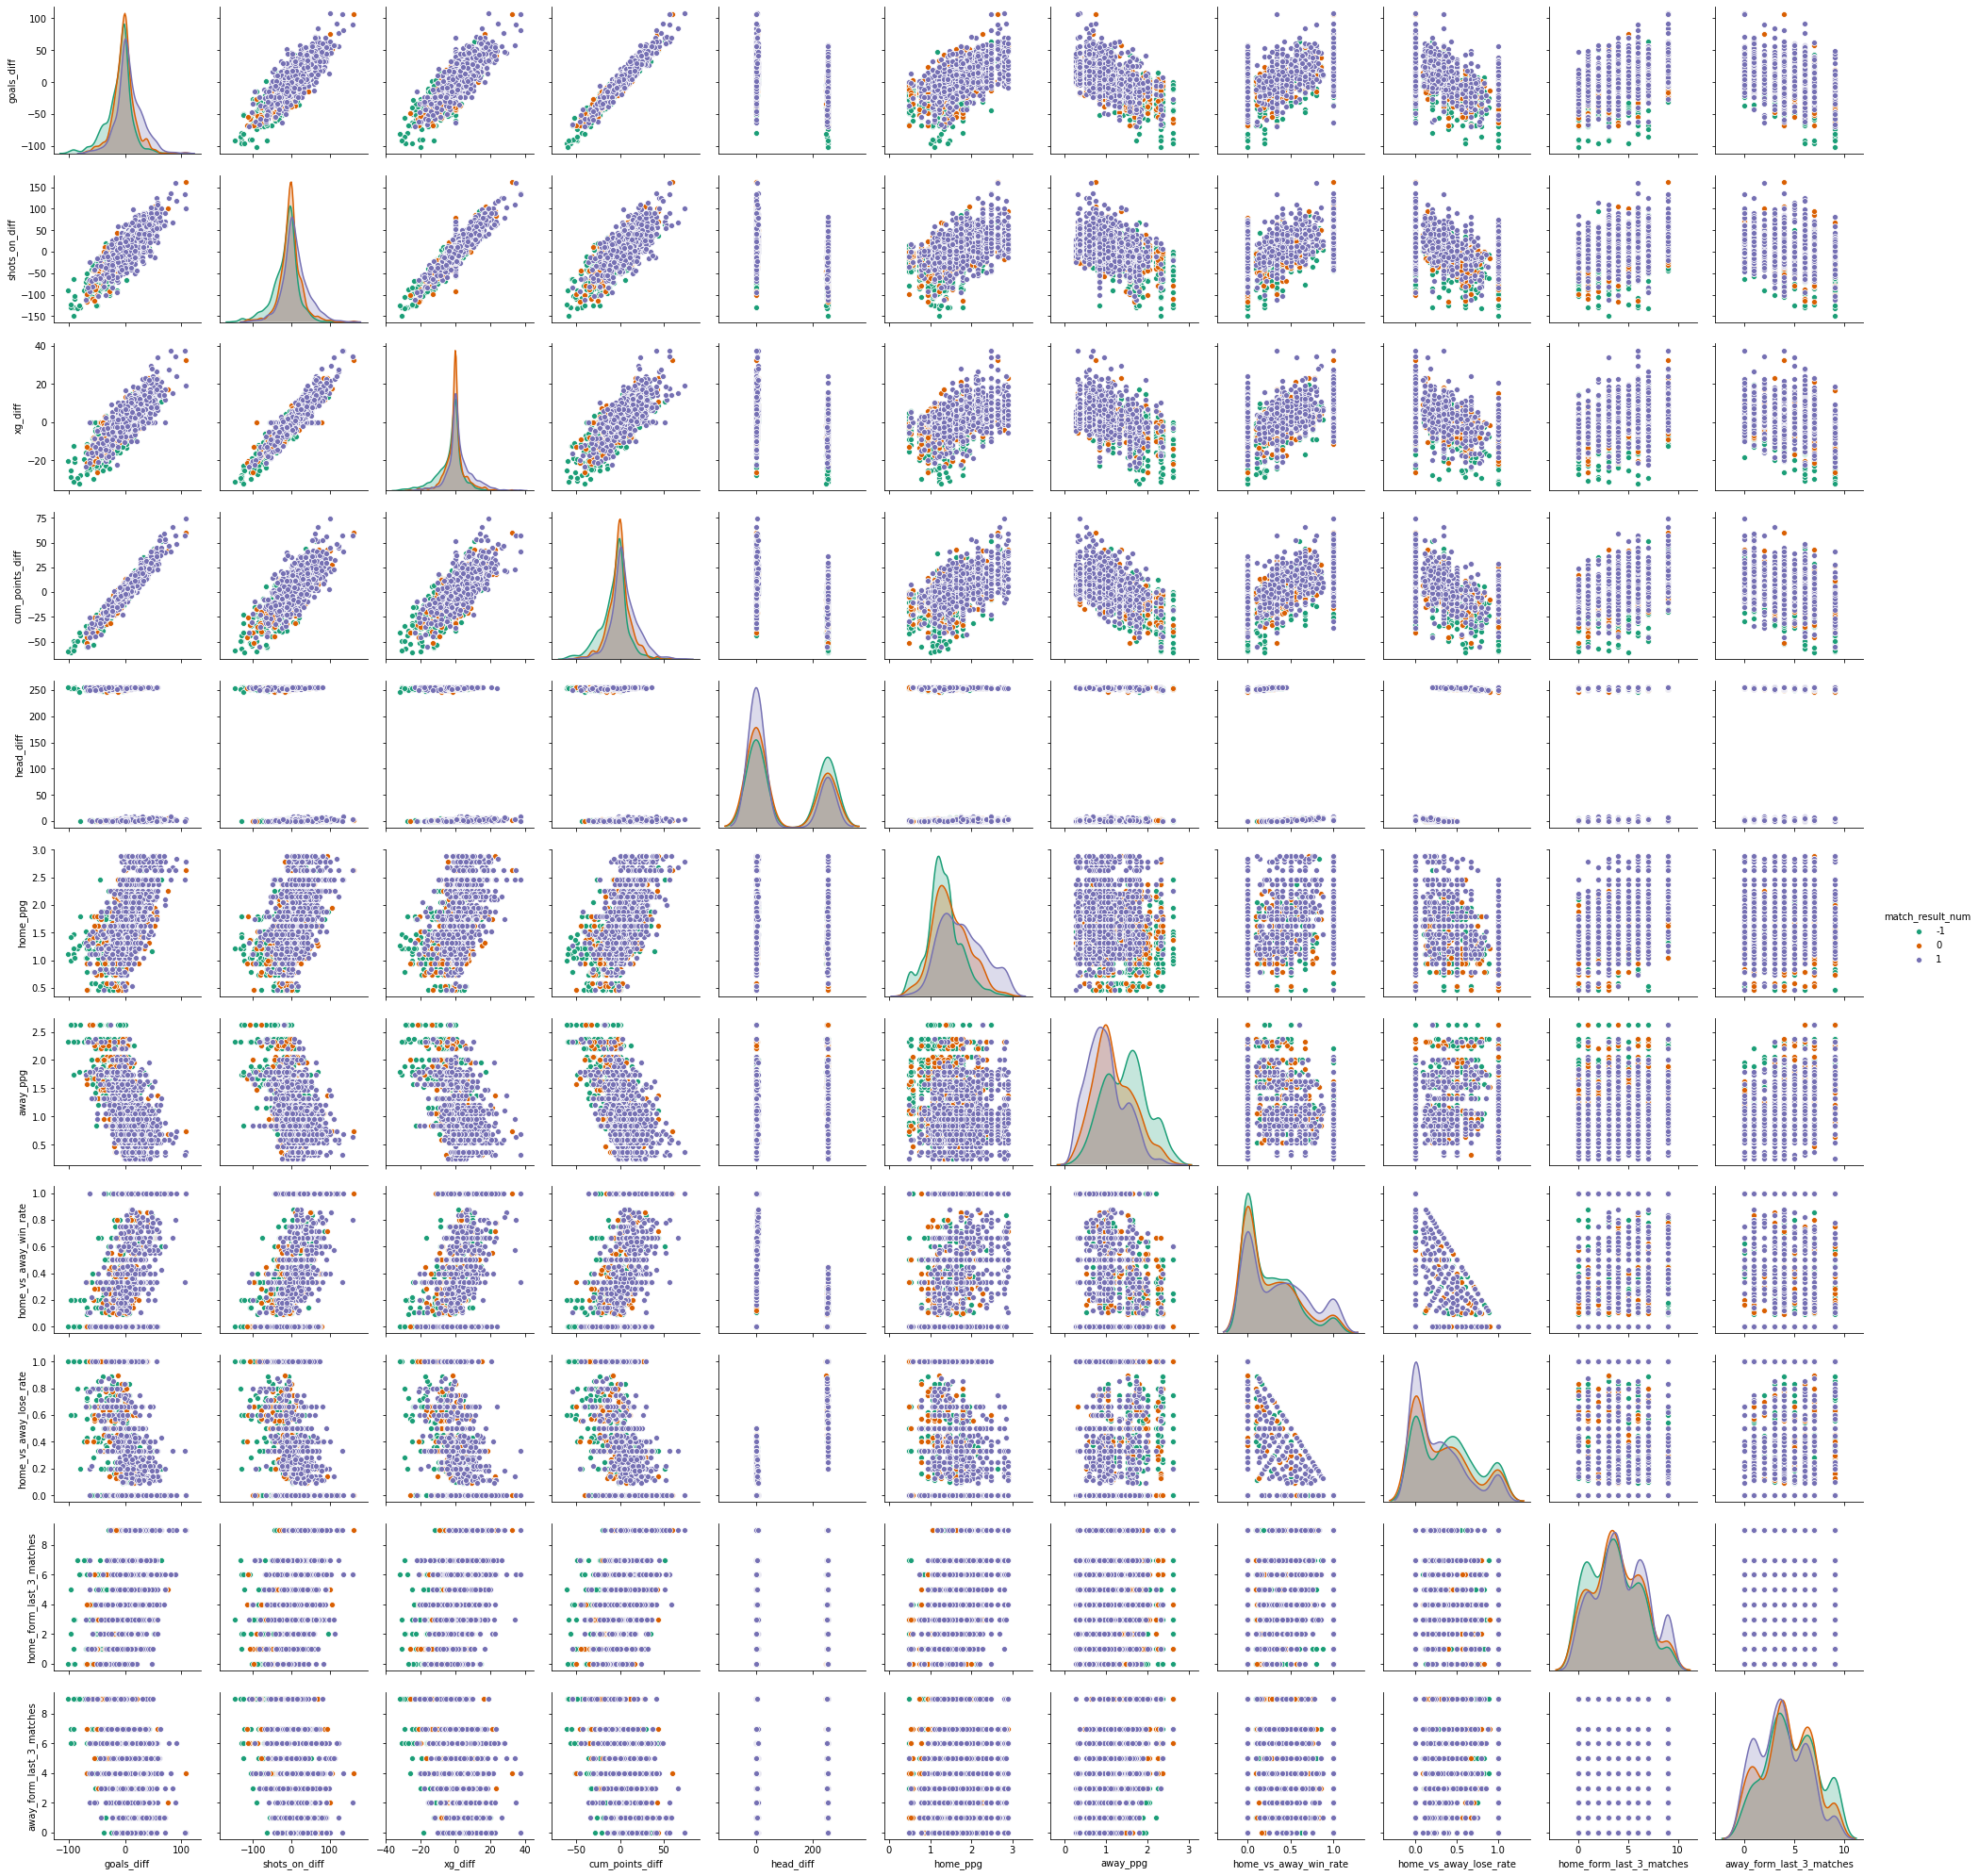

In [46]:
sns.pairplot(epl_15_20_matches_top_features, hue='match_result_num', palette='Dark2')

## Heatmap to see the most important features 

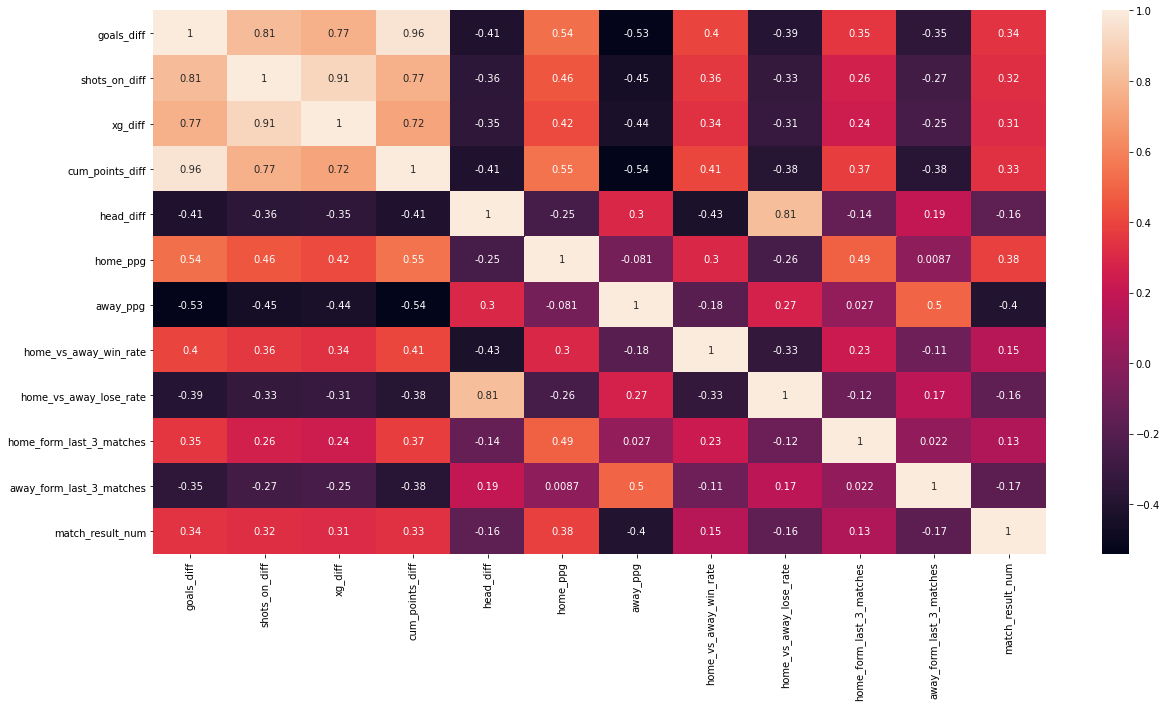

In [47]:
plt.figure(figsize=(20,10)) 
sns.heatmap(epl_15_20_matches_top_features.corr(), annot= True)

## Extraction of X and Y to start scaling, splitting and testing

In [48]:
X = epl_15_20_matches_top_features.drop('match_result_num',axis=1)
y = epl_15_20_matches_top_features['match_result_num']

In [49]:
from sklearn.preprocessing import scale

for col in top_features4:
    X[col] = scale(X[col])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 2279
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   goals_diff                2280 non-null   float64
 1   shots_on_diff             2280 non-null   float64
 2   xg_diff                   2280 non-null   float64
 3   cum_points_diff           2280 non-null   float64
 4   head_diff                 2280 non-null   float64
 5   home_ppg                  2280 non-null   float64
 6   away_ppg                  2280 non-null   float64
 7   home_vs_away_win_rate     2280 non-null   float64
 8   home_vs_away_lose_rate    2280 non-null   float64
 9   home_form_last_3_matches  2280 non-null   float64
 10  away_form_last_3_matches  2280 non-null   float64
dtypes: float64(11)
memory usage: 293.8 KB


## Machine Learning Model

#### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
predictions = model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.61      0.66      0.63       122
           0       0.12      0.03      0.05        62
           1       0.67      0.82      0.74       158

    accuracy                           0.62       342
   macro avg       0.47      0.50      0.47       342
weighted avg       0.55      0.62      0.58       342



In [58]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [59]:
confusion_matrix(y_test,predictions)

array([[ 80,   9,  33],
       [ 28,   2,  32],
       [ 23,   5, 130]], dtype=int64)

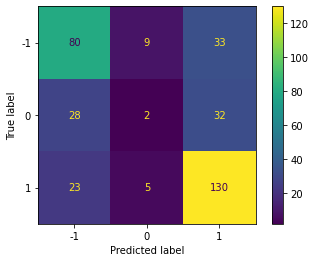

In [60]:
plot_confusion_matrix(model,X_test,y_test)

In [61]:
pd.DataFrame(index=X.columns,data=model.coef_[0],columns=['Feature Importance'])

,Feature Importance
goals_diff,-0.047071
shots_on_diff,-0.068467
xg_diff,-0.146358
cum_points_diff,0.370808
head_diff,-0.073944
home_ppg,-0.708612
away_ppg,0.758626
home_vs_away_win_rate,0.047575
home_vs_away_lose_rate,0.041893
home_form_last_3_matches,0.020227


#### KNeighborsClassifier Using GridSearchCV

In [62]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params().keys()

operations = [('scaler',scaler),('knn',knn)]

from sklearn.pipeline import Pipeline

pipe = Pipeline(operations)

In [63]:
k_values = list(range(1,20))

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=10,scoring='accuracy',verbose=True,n_jobs=-1)

In [65]:
full_cv_classifier.fit(X_train,y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    2.8s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=True)

In [66]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [67]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.00937505, 0.00727212, 0.0069916 , 0.0122961 , 0.0124999 ,
        0.01090422, 0.00664444, 0.01060896, 0.01045692, 0.01154277,
        0.00985951, 0.00844572, 0.00994759, 0.01268001, 0.00949574,
        0.00748119, 0.01082447, 0.00740359, 0.01249967]),
 'std_fit_time': array([0.00765469, 0.00815948, 0.0088006 , 0.00845399, 0.00624995,
        0.00715275, 0.00694619, 0.00647594, 0.00833977, 0.00776156,
        0.00666999, 0.00584707, 0.00574086, 0.00658407, 0.00618541,
        0.00713312, 0.00757327, 0.0071055 , 0.00624983]),
 'mean_score_time': array([0.01669741, 0.01806905, 0.01874983, 0.01492901, 0.01603897,
        0.01463602, 0.01696699, 0.01621311, 0.01611593, 0.01841121,
        0.01926277, 0.01673033, 0.0144655 , 0.01622345, 0.01670172,
        0.01889541, 0.01670849, 0.01858056, 0.01814117]),
 'std_score_time': array([0.00215682, 0.00911154, 0.00625002, 0.00506856, 0.00082859,
        0.00797445, 0.00383639, 0.00135406, 0.00364486, 0.00826023,
        

Text(0.5, 0, 'K Value')

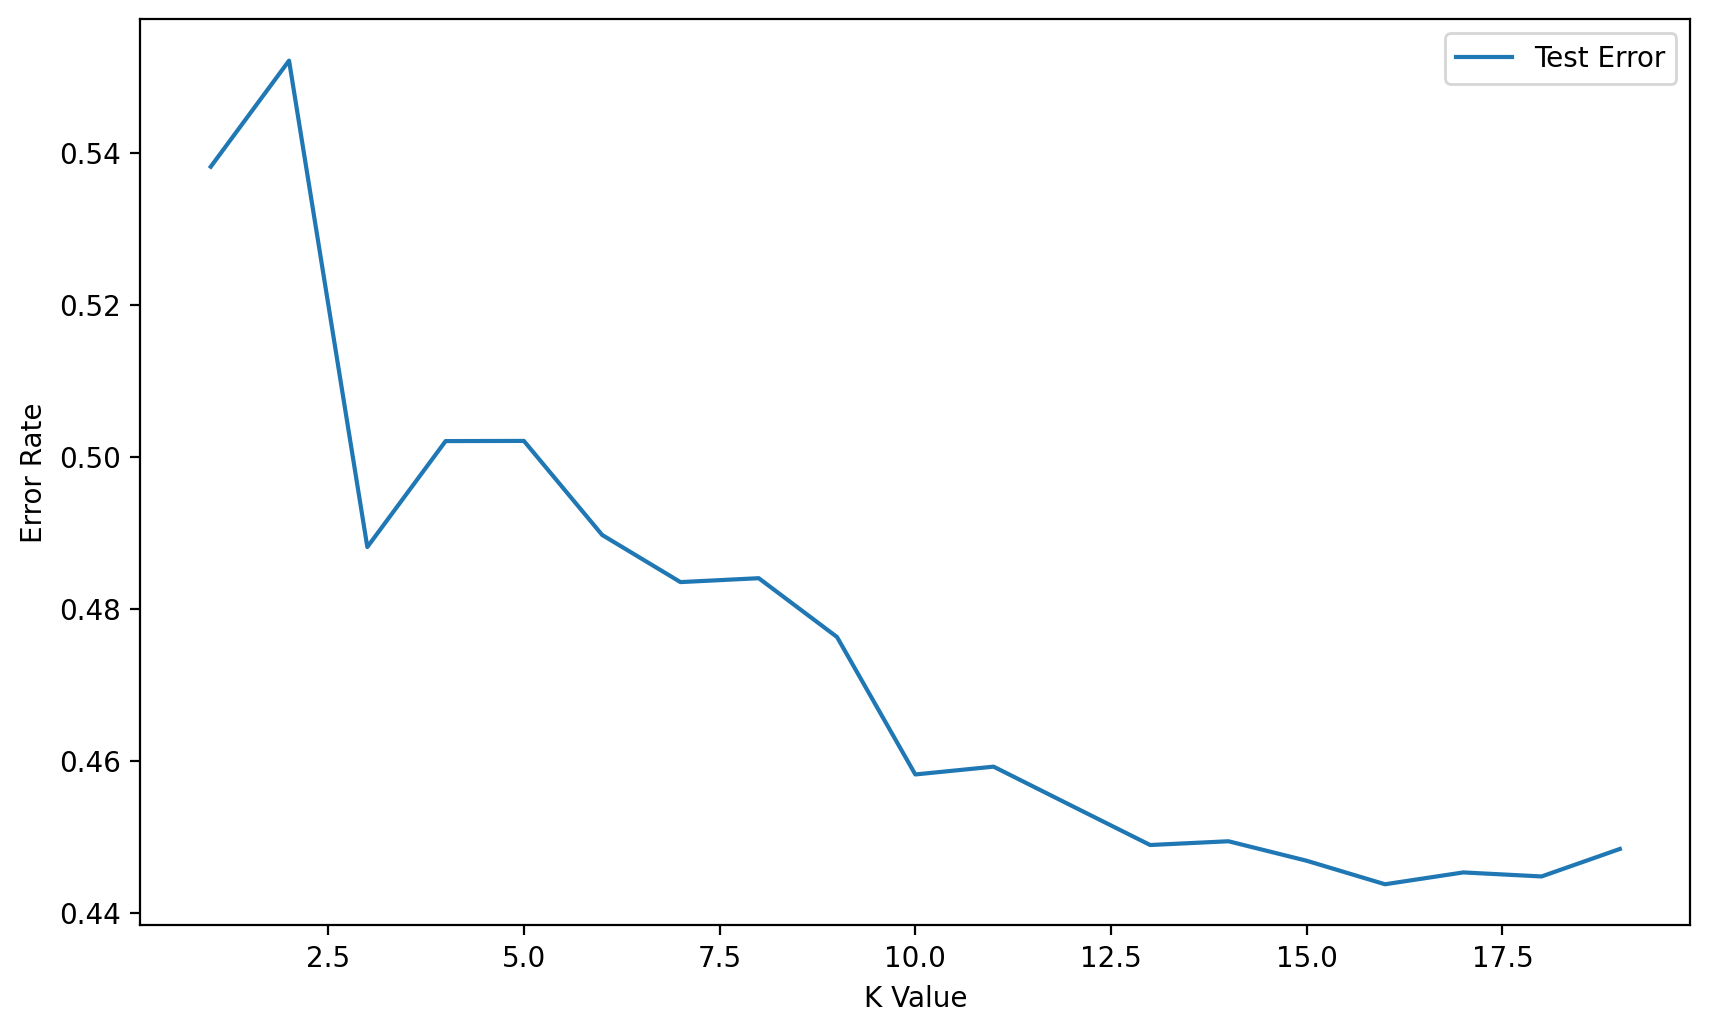

In [68]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),1 - full_cv_classifier.cv_results_['mean_test_score'],label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [69]:
predictions = full_cv_classifier.predict(X_test)

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.51      0.50      0.51       122
           0       0.25      0.21      0.23        62
           1       0.61      0.66      0.64       158

    accuracy                           0.52       342
   macro avg       0.46      0.46      0.46       342
weighted avg       0.51      0.52      0.52       342



In [71]:
confusion_matrix(y_test,predictions)

array([[ 61,  17,  44],
       [ 26,  13,  23],
       [ 32,  21, 105]], dtype=int64)

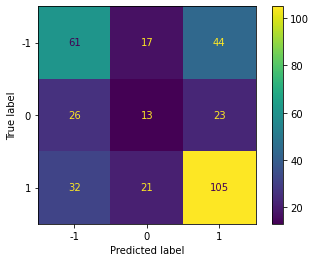

In [72]:
plot_confusion_matrix(full_cv_classifier,X_test,y_test)

## Questions & Visualizations

In [73]:
epl_modified_stats = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (3)/football_prediction-main/england-premier-league-league-2015-to-2022-stats.csv')
epl_modified_teams = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (3)/football_prediction-main/england-premier-league-league-2015-to-2022-teams.csv')
epl_modified_teams2 = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (3)/football_prediction-main/england-premier-league-league-2015-to-2022-teams2.csv')
epl_2022_stats = pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (3)/football_prediction-main/england-premier-league-teams-2021-to-2022-stats.csv')
match_scr=pd.read_csv('C:/Users/ShadoWalker/Desktop/football_prediction-main (1)/football_prediction-main/england-premier-league-league-2015-to-2022--matches.csv')


In [74]:
epl_modified_stats.head()

,name,season,status,attendance,number_of_clubs,total_matches,matches_completed,game_week,total_game_week,progress,...,goals_min_61_to_70,goals_min_71_to_80,goals_min_81_to_90,goals_min_0_to_15,goals_min_16_to_30,goals_min_31_to_45,goals_min_46_to_60,goals_min_61_to_75,goals_min_76_to_90,xg_avg_per_match
0,Premier League,2015/2016,Completed,43250,20,380,380,38,38,100,...,128,104,173,117,154,186,164,177,228,0.00
1,Premier League,2016/2017,Completed,41024,20,380,380,38,38,100,...,114,119,191,132,134,196,178,176,248,3.26
2,Premier League,2017/2018,Completed,45849,20,380,380,38,38,100,...,124,123,171,119,148,160,173,190,228,2.91
3,Premier League,2018/2019,Completed,44060,20,380,380,38,38,100,...,133,119,186,134,172,170,158,185,253,2.80
4,Premier League,2019/2020,Completed,39050,20,380,380,38,38,100,...,100,120,169,115,158,202,170,166,223,3.11


In [75]:
epl_modified_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   name                                 7 non-null      object 
 1   season                               7 non-null      object 
 2   status                               7 non-null      object 
 3   attendance                           7 non-null      int64  
 4   number_of_clubs                      7 non-null      int64  
 5   total_matches                        7 non-null      int64  
 6   matches_completed                    7 non-null      int64  
 7   game_week                            7 non-null      int64  
 8   total_game_week                      7 non-null      int64  
 9   progress                             7 non-null      int64  
 10  average_goals_per_match              7 non-null      float64
 11  average_scored_home_team            

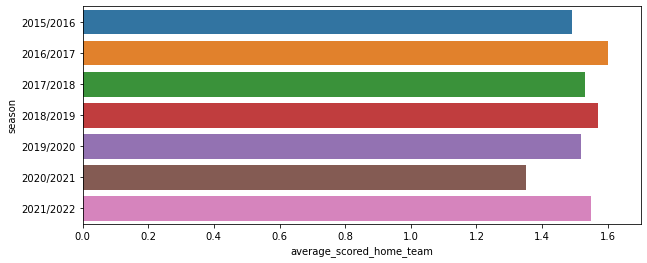

In [76]:
# is there an effect of COVID-19 on the matches?
plt.figure(figsize=(10,4))
plt.xlim(0.0, 1.7)
sns.barplot(data=epl_modified_stats, x='average_scored_home_team', y='season')

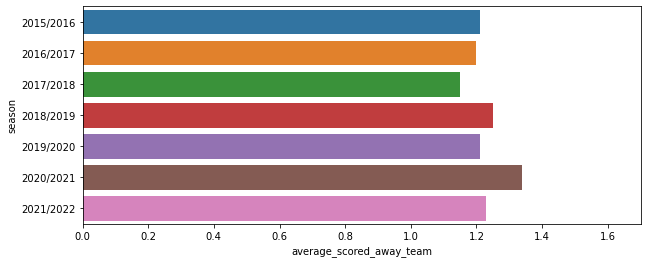

In [77]:
plt.figure(figsize=(10,4))
plt.xlim(0.0, 1.7)
sns.barplot(data=epl_modified_stats, x='average_scored_away_team', y='season')

In [78]:
epl_modified_teams.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage
0,Arsenal FC,Arsenal,2015/2016,England,38,19,19,0,20,12,...,3,1,6,29,21,37,18,16,21,8
1,Arsenal FC,Arsenal,2016/2017,England,38,19,19,0,23,14,...,7,3,5,16,16,16,24,11,37,8
2,Arsenal FC,Arsenal,2017/2018,England,38,19,19,0,19,15,...,7,8,8,16,11,21,34,11,58,11
3,Arsenal FC,Arsenal,2018/2019,England,38,19,19,0,21,14,...,12,1,8,18,16,21,26,11,42,5
4,Arsenal FC,Arsenal,2019/2020,England,38,19,19,0,14,10,...,2,5,9,37,32,42,26,16,37,34


In [79]:
epl_modified_teams2.head()

,team_name,common_name,season,country,average_attendance_overall,average_attendance_home,average_attendance_away,minutes_per_goal_scored_overall,minutes_per_goal_scored_home,minutes_per_goal_scored_away,...,btts_2h_away,btts_2h_percentage_overall,btts_2h_percentage_home,btts_2h_percentage_away,clean_sheets_2h_overall,clean_sheets_2h_home,clean_sheets_2h_away,failed_to_score_2h_overall,failed_to_score_2h_home,failed_to_score_2h_away
0,Arsenal FC,Arsenal,2015/2016,England,47407,59941,35533,53,55,50,...,6,16,0,32,26,15,11,19,10,9
1,Arsenal FC,Arsenal,2016/2017,England,47142,59952,35005,44,44,45,...,9,34,21,47,18,14,4,10,3,7
2,Arsenal FC,Arsenal,2017/2018,England,48852,59323,38381,46,32,86,...,7,37,37,37,17,11,6,14,4,10
3,Arsenal FC,Arsenal,2018/2019,England,49412,59899,38925,47,41,55,...,6,28,26,32,18,12,6,14,4,10
4,Arsenal FC,Arsenal,2019/2020,England,36482,47589,25376,61,48,86,...,3,16,16,16,21,10,11,19,10,9


In [80]:
# Is there an effect of being ahead at half time and winning the match?

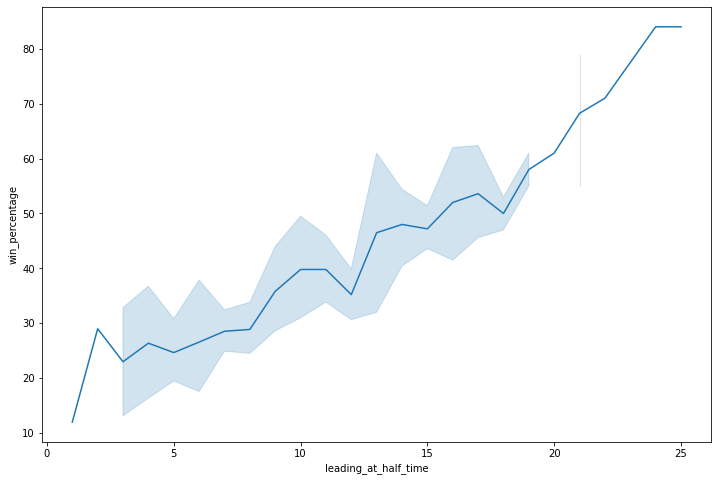

In [81]:
plt.figure(figsize=(12,8))
sns.lineplot(y='win_percentage',x='leading_at_half_time',data=epl_modified_teams)

In [82]:
# What is the estimate conversion of total shots into goals?

In [83]:
epl_2022_stats.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage
0,Arsenal FC,Arsenal,2021/2022,England,18,9,9,1,10,7,...,1,7,3,11,11,11,33,11,56,12
1,Tottenham Hotspur FC,Tottenham Hotspur,2021/2022,England,14,8,6,3,8,6,...,2,2,5,7,0,17,36,25,50,14
2,Manchester City FC,Manchester City,2021/2022,England,17,9,8,0,13,7,...,0,2,3,12,11,13,12,11,13,18
3,Leicester City FC,Leicester City,2021/2022,England,16,8,8,2,6,4,...,3,3,2,25,13,38,38,38,38,13
4,Crystal Palace FC,Crystal Palace,2021/2022,England,17,9,8,1,4,3,...,3,2,5,47,56,38,29,11,50,12


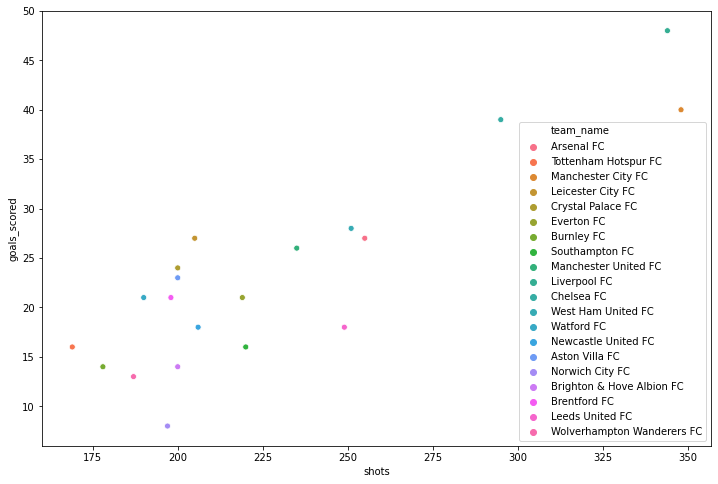

In [84]:
plt.figure(figsize=(12,8))
sns.scatterplot(data= epl_2022_stats, x="shots", y="goals_scored",hue='team_name')

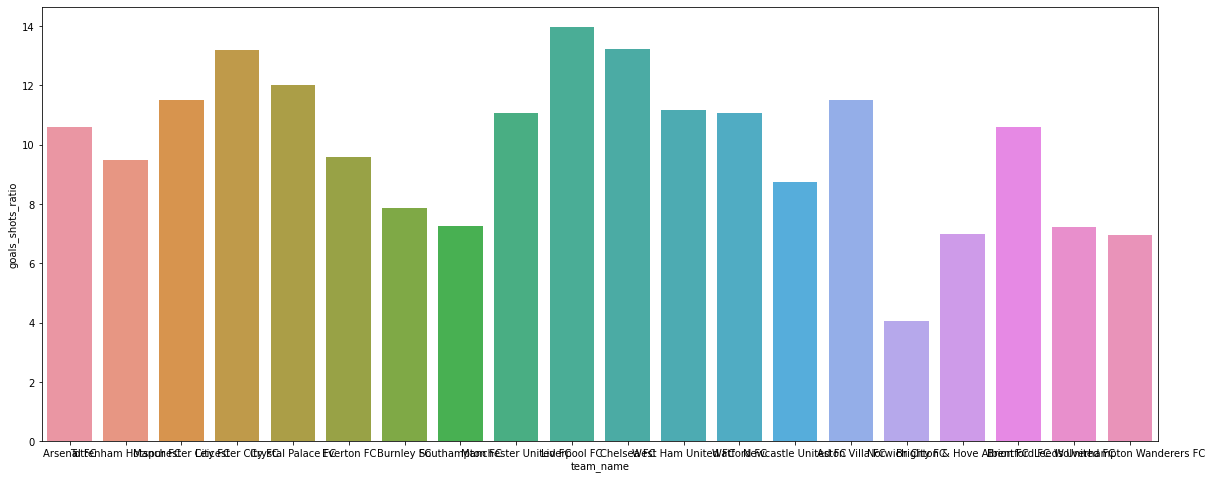

In [85]:
epl_2022_stats['goals_shots_ratio'] = epl_2022_stats['goals_scored'] / epl_2022_stats['shots'] *100
plt.figure(figsize=(20,8))
sns.barplot(data=epl_2022_stats, x='team_name', y='goals_shots_ratio')


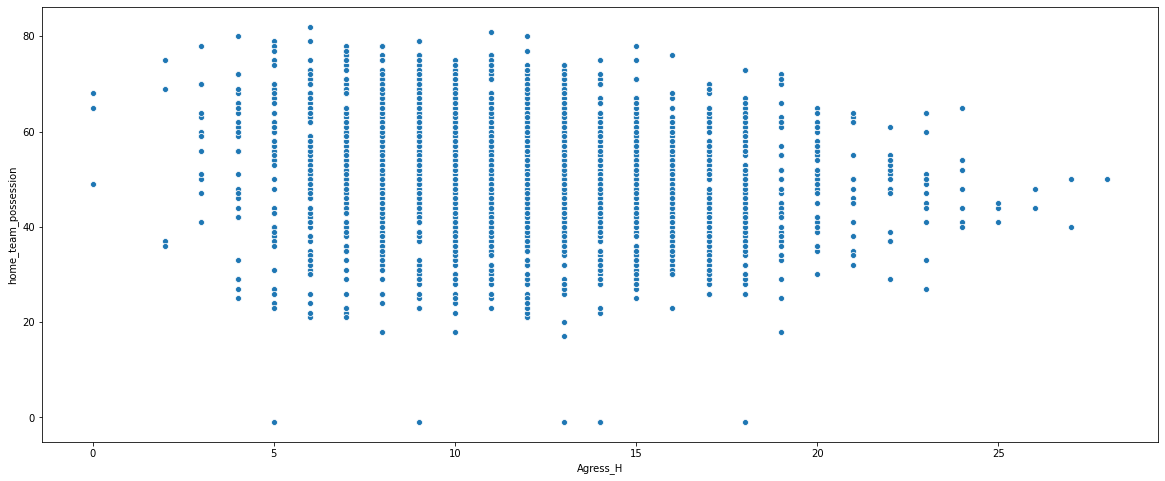

In [86]:
#Does having more possession than your opponent leads to more  fouls &Cards?
epl_15_20_matches['Agress_H']= epl_15_20_matches['home_team_fouls']+ epl_15_20_matches['home_team_yellow_cards']+ epl_15_20_matches['home_team_red_cards']
plt.figure(figsize=(20,8))
sns.scatterplot(data=epl_15_20_matches, x= epl_15_20_matches['Agress_H'],y= epl_15_20_matches['home_team_possession'] )
#answer_: No relationship

In [87]:
epl_15_20_matches.head(10)

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,Away_Home_Draw_Rate,Away_Away_Draw_Rate,Away_Total_Win_Rate,Away_Total_Loss_Rate,Away_Total_Draw_Rate,home_gf_total,home_ga_total,away_gf_total,away_ga_total,Agress_H
0,1439034300,Aug 08 2015 - 11:45am,complete,NaN,Manchester United,Tottenham Hotspur,Jonathan Moss,1,0.0,0.0,...,0.438596,0.438596,0.548246,0.232456,0.438596,202,100,198,135,14
1,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,AFC Bournemouth,Aston Villa,Mark Clattenburg,1,0.0,0.0,...,0.403509,0.403509,0.245614,0.552632,0.403509,136,148,58,97,15
2,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Norwich City,Crystal Palace,Simon Hooper,1,0.0,0.0,...,0.438596,0.438596,0.311404,0.469298,0.438596,45,67,131,188,15
3,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Leicester City,Sunderland,Lee Mason,1,0.0,0.0,...,0.473684,0.473684,0.197368,0.565789,0.473684,184,132,38,77,15
4,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Everton,Watford,Mike Jones,1,0.0,0.0,...,0.442105,0.442105,0.294737,0.484211,0.442105,183,138,92,171,8
5,1439051400,Aug 08 2015 - 4:30pm,complete,NaN,Chelsea,Swansea City,Michael Oliver,1,0.0,0.0,...,0.438596,0.438596,0.280702,0.500000,0.438596,217,109,51,100,16
6,1439123400,Aug 09 2015 - 12:30pm,complete,NaN,Newcastle United,Southampton,Craig Pawson,1,0.0,0.0,...,0.526316,0.526316,0.320175,0.416667,0.526316,123,120,128,179,12
7,1439123400,Aug 09 2015 - 12:30pm,complete,NaN,Arsenal,West Ham United,Martin Atkinson,1,0.0,0.0,...,0.517544,0.517544,0.359649,0.381579,0.517544,226,108,152,182,13
8,1439132400,Aug 09 2015 - 3:00pm,complete,NaN,Stoke City,Liverpool,Anthony Taylor,1,0.0,0.0,...,0.464912,0.464912,0.618421,0.149123,0.464912,66,78,208,131,10
9,1439233200,Aug 10 2015 - 7:00pm,complete,NaN,West Bromwich Albion,Manchester City,Mike Dean,1,0.0,0.0,...,0.280702,0.280702,0.697368,0.162281,0.280702,83,116,235,103,16


In [88]:
epl_15_20_points_total.head(5)

,season,Game Week,team_name,points_result
1,2015/2016,1,AFC Bournemouth,0.0
19,2015/2016,2,AFC Bournemouth,0.0
22,2015/2016,3,AFC Bournemouth,0.0
32,2015/2016,4,AFC Bournemouth,3.0
41,2015/2016,5,AFC Bournemouth,4.0


In [89]:
#Is there a relationship between being on top mid season and winning the league title?
seasons=['2015/2016', '2016/2017', '2017/2018', '2018/2019', '2019/2020']


In [90]:
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==20].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Top_15_16_20= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[0]] [['team_name', 'Game Week','points_result','season']]
Top_15_16_20[:5]

,team_name,Game Week,points_result,season
192,Leicester City,20,39.0,2015/2016
193,Arsenal,20,39.0,2015/2016
197,Manchester City,20,36.0,2015/2016
199,Tottenham Hotspur,20,35.0,2015/2016
198,Crystal Palace,20,31.0,2015/2016


In [91]:
#who actually won 2015/2016 league?
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==38].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Champion_15_16= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[0]] [['team_name', 'Game Week','points_result','season']]
Champion_15_16[:5]

,team_name,Game Week,points_result,season
372,Leicester City,38,80.0,2015/2016
377,Tottenham Hotspur,38,70.0,2015/2016
370,Arsenal,38,68.0,2015/2016
374,Manchester City,38,65.0,2015/2016
379,Manchester United,38,63.0,2015/2016


In [92]:
#who was on top till mid league for season 2016/2017?
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==20].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Top_16_17_20= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[1]][['team_name', 'Game Week','points_result','season']]
Top_16_17_20[:5]

,team_name,Game Week,points_result,season
579,Chelsea,20,49.0,2016/2017
573,Liverpool,20,43.0,2016/2017
576,Arsenal,20,40.0,2016/2017
579,Tottenham Hotspur,20,39.0,2016/2017
572,Manchester City,20,39.0,2016/2017


In [93]:
#Champion 2016/2017
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==38].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Champion_16_17= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[1]] [['team_name', 'Game Week','points_result','season']]
Champion_16_17[:5]

,team_name,Game Week,points_result,season
752,Chelsea,38,90.0,2016/2017
753,Tottenham Hotspur,38,83.0,2016/2017
759,Manchester City,38,75.0,2016/2017
755,Liverpool,38,73.0,2016/2017
750,Arsenal,38,72.0,2016/2017


In [94]:
#who was on top till mid league for season 2017/2018?
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==20].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Top_17_18_20= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[2]] [['team_name', 'Game Week','points_result','season']]
Top_17_18_20[:5]

,team_name,Game Week,points_result,season
958,Manchester City,20,55.0,2017/2018
954,Manchester United,20,42.0,2017/2018
952,Chelsea,20,39.0,2017/2018
957,Liverpool,20,35.0,2017/2018
950,Tottenham Hotspur,20,34.0,2017/2018


In [95]:
#Champion 2017/2018
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==38].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Champion_17_18= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[2]][['team_name', 'Game Week','points_result','season']]
Champion_17_18[:5]

,team_name,Game Week,points_result,season
1136,Manchester City,38,97.0,2017/2018
1134,Manchester United,38,78.0,2017/2018
1138,Tottenham Hotspur,38,74.0,2017/2018
1133,Liverpool,38,72.0,2017/2018
1135,Chelsea,38,70.0,2017/2018


In [96]:
#who was on top till mid league for season 2018/2019?
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==20].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Top_18_19_20= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[3]] [['team_name', 'Game Week','points_result','season']]
Top_18_19_20[:5]

,team_name,Game Week,points_result,season
1335,Liverpool,20,51.0,2018/2019
1333,Tottenham Hotspur,20,45.0,2018/2019
1338,Manchester City,20,44.0,2018/2019
1336,Chelsea,20,40.0,2018/2019
1335,Arsenal,20,38.0,2018/2019


In [97]:
#Champion 2018/2019
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==38].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Champion_18_19= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[3]][['team_name', 'Game Week','points_result','season']]
Champion_18_19[:5]
# This is the first instance in 4 seasons that the top team till mid league fails to end up winning the league.
#In fact Liverpool was the runner up by just 1 point!!

,team_name,Game Week,points_result,season
1510,Manchester City,38,95.0,2018/2019
1515,Liverpool,38,94.0,2018/2019
1514,Chelsea,38,71.0,2018/2019
1518,Tottenham Hotspur,38,70.0,2018/2019
1511,Arsenal,38,67.0,2018/2019


In [98]:
#who was on top till mid league for season 2019/2020?
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==20].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Top_19_20_20= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[4]][['team_name', 'Game Week','points_result','season']]
Top_19_20_20[:5]

,team_name,Game Week,points_result,season
1717,Liverpool,20,55.0,2019/2020
1714,Leicester City,20,39.0,2019/2020
1718,Manchester City,20,38.0,2019/2020
1716,Chelsea,20,32.0,2019/2020
1717,Wolverhampton Wanderers,20,30.0,2019/2020


In [99]:
#Champion 2018/2019
top_all_seasons_week_20= epl_15_20_points_total[epl_15_20_points_total['Game Week']==38].sort_values('points_result',ascending=False) [['team_name', 'Game Week','points_result','season']]
Champion_19_20= top_all_seasons_week_20[top_all_seasons_week_20['season']== seasons[4]] [['team_name', 'Game Week','points_result','season']]
Champion_19_20[:5]


,team_name,Game Week,points_result,season
1897,Liverpool,38,96.0,2019/2020
1896,Manchester City,38,78.0,2019/2020
1892,Chelsea,38,63.0,2019/2020
1895,Manchester United,38,63.0,2019/2020
1895,Leicester City,38,62.0,2019/2020


In [100]:
matches=  pd.concat([epl_15_16_matches, epl_16_17_matches, 
                               epl_17_18_matches,epl_18_19_matches, epl_19_20_matches,
                               epl_20_21_matches], axis=0)
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 379
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            2280 non-null   int64  
 1   date_GMT                             2280 non-null   object 
 2   status                               2280 non-null   object 
 3   attendance                           2167 non-null   float64
 4   home_team_name                       2280 non-null   object 
 5   away_team_name                       2280 non-null   object 
 6   referee                              1545 non-null   object 
 7   Game Week                            2280 non-null   int64  
 8   Pre-Match PPG (Home)                 2280 non-null   float64
 9   Pre-Match PPG (Away)                 2280 non-null   float64
 10  home_ppg                             2280 non-null   float64
 11  away_ppg                       

In [101]:
#Is there a relationship between scoring first and winning the match?

In [102]:
match_scr['home_team_goal_timings_1']= match_scr['home_team_goal_timings_1'].fillna(200)
match_scr['away_team_goal_timings_1']= match_scr['away_team_goal_timings_1'].fillna(200)
match_scr.drop(match_scr.columns.difference(['home_team_goal_timings_1','away_team_goal_timings_1','home_team_name','away_team_name']), 1, inplace=True)
match_scr.head(40)

,home_team_name,away_team_name,home_team_goal_timings_1,away_team_goal_timings_1
0,Manchester United,Tottenham Hotspur,22,200
1,AFC Bournemouth,Aston Villa,200,72
2,Norwich City,Crystal Palace,69,39
3,Leicester City,Sunderland,11,60
4,Everton,Watford,76,13
5,Chelsea,Swansea City,23,29
6,Newcastle United,Southampton,42,24
7,Arsenal,West Ham United,200,43
8,Stoke City,Liverpool,200,86
9,West Bromwich Albion,Manchester City,200,9


In [103]:
match_scr['home_team_goal_timings_1'] = match_scr['home_team_goal_timings_1'].astype(str)
match_scr['away_team_goal_timings_1'] = match_scr['away_team_goal_timings_1'].astype(str)
match_scr['home_team_goal_timings_1_s']=match_scr['home_team_goal_timings_1'].apply(lambda x: x.replace("'", "."))
match_scr['away_team_goal_timings_1_s']=match_scr['away_team_goal_timings_1'].apply(lambda x: x.replace("'", "."))
match_scr.head(40)

,home_team_name,away_team_name,home_team_goal_timings_1,away_team_goal_timings_1,home_team_goal_timings_1_s,away_team_goal_timings_1_s
0,Manchester United,Tottenham Hotspur,22,200,22,200
1,AFC Bournemouth,Aston Villa,200,72,200,72
2,Norwich City,Crystal Palace,69,39,69,39
3,Leicester City,Sunderland,11,60,11,60
4,Everton,Watford,76,13,76,13
5,Chelsea,Swansea City,23,29,23,29
6,Newcastle United,Southampton,42,24,42,24
7,Arsenal,West Ham United,200,43,200,43
8,Stoke City,Liverpool,200,86,200,86
9,West Bromwich Albion,Manchester City,200,9,200,9


In [104]:
match_scr.drop(match_scr.columns.difference(['home_team_goal_timings_1_s','away_team_goal_timings_1_s','home_team_name','away_team_name']), 1, inplace=True)
match_scr.head(40)

,home_team_name,away_team_name,home_team_goal_timings_1_s,away_team_goal_timings_1_s
0,Manchester United,Tottenham Hotspur,22,200
1,AFC Bournemouth,Aston Villa,200,72
2,Norwich City,Crystal Palace,69,39
3,Leicester City,Sunderland,11,60
4,Everton,Watford,76,13
5,Chelsea,Swansea City,23,29
6,Newcastle United,Southampton,42,24
7,Arsenal,West Ham United,200,43
8,Stoke City,Liverpool,200,86
9,West Bromwich Albion,Manchester City,200,9


In [105]:
match_scr['home_team_goal_timings_1_f'] = pd.to_numeric(match_scr['home_team_goal_timings_1_s'])
match_scr['away_team_goal_timings_1_f'] = pd.to_numeric(match_scr['away_team_goal_timings_1_s'])
match_scr.drop(match_scr.columns.difference(['home_team_goal_timings_1_f','away_team_goal_timings_1_f','home_team_name','away_team_name']), 1, inplace=True)
match_scr.head(40)

,home_team_name,away_team_name,home_team_goal_timings_1_f,away_team_goal_timings_1_f
0,Manchester United,Tottenham Hotspur,22.0,200.0
1,AFC Bournemouth,Aston Villa,200.0,72.0
2,Norwich City,Crystal Palace,69.0,39.0
3,Leicester City,Sunderland,11.0,60.0
4,Everton,Watford,76.0,13.0
5,Chelsea,Swansea City,23.0,29.0
6,Newcastle United,Southampton,42.0,24.0
7,Arsenal,West Ham United,200.0,43.0
8,Stoke City,Liverpool,200.0,86.0
9,West Bromwich Albion,Manchester City,200.0,9.0


In [106]:
match_scr['scored_first'] = np.where(match_scr["home_team_goal_timings_1_f"] < match_scr["away_team_goal_timings_1_f"], 'H', 'A')
match_scr.head(50)

,home_team_name,away_team_name,home_team_goal_timings_1_f,away_team_goal_timings_1_f,scored_first
0,Manchester United,Tottenham Hotspur,22.0,200.0,H
1,AFC Bournemouth,Aston Villa,200.0,72.0,A
2,Norwich City,Crystal Palace,69.0,39.0,A
3,Leicester City,Sunderland,11.0,60.0,H
4,Everton,Watford,76.0,13.0,A
5,Chelsea,Swansea City,23.0,29.0,H
6,Newcastle United,Southampton,42.0,24.0,A
7,Arsenal,West Ham United,200.0,43.0,A
8,Stoke City,Liverpool,200.0,86.0,A
9,West Bromwich Albion,Manchester City,200.0,9.0,A


In [107]:
index_names = match_scr[ match_scr['home_team_goal_timings_1_f'] == 200.0 ].index & match_scr[ match_scr['away_team_goal_timings_1_f'] == 200.0	 ].index
match_scr.drop(index_names, inplace = True)
match_scr.head(10)

,home_team_name,away_team_name,home_team_goal_timings_1_f,away_team_goal_timings_1_f,scored_first
0,Manchester United,Tottenham Hotspur,22.0,200.0,H
1,AFC Bournemouth,Aston Villa,200.0,72.0,A
2,Norwich City,Crystal Palace,69.0,39.0,A
3,Leicester City,Sunderland,11.0,60.0,H
4,Everton,Watford,76.0,13.0,A
5,Chelsea,Swansea City,23.0,29.0,H
6,Newcastle United,Southampton,42.0,24.0,A
7,Arsenal,West Ham United,200.0,43.0,A
8,Stoke City,Liverpool,200.0,86.0,A
9,West Bromwich Albion,Manchester City,200.0,9.0,A


In [108]:
epl_15_20_matches.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,Away_Home_Draw_Rate,Away_Away_Draw_Rate,Away_Total_Win_Rate,Away_Total_Loss_Rate,Away_Total_Draw_Rate,home_gf_total,home_ga_total,away_gf_total,away_ga_total,Agress_H
0,1439034300,Aug 08 2015 - 11:45am,complete,NaN,Manchester United,Tottenham Hotspur,Jonathan Moss,1,0.0,0.0,...,0.438596,0.438596,0.548246,0.232456,0.438596,202,100,198,135,14
1,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,AFC Bournemouth,Aston Villa,Mark Clattenburg,1,0.0,0.0,...,0.403509,0.403509,0.245614,0.552632,0.403509,136,148,58,97,15
2,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Norwich City,Crystal Palace,Simon Hooper,1,0.0,0.0,...,0.438596,0.438596,0.311404,0.469298,0.438596,45,67,131,188,15
3,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Leicester City,Sunderland,Lee Mason,1,0.0,0.0,...,0.473684,0.473684,0.197368,0.565789,0.473684,184,132,38,77,15
4,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Everton,Watford,Mike Jones,1,0.0,0.0,...,0.442105,0.442105,0.294737,0.484211,0.442105,183,138,92,171,8


In [115]:
index_names_epl = epl_15_20_matches[ epl_15_20_matches['match_result_txt'] == "D" ].index 
epl_15_20_matches.drop(index_names_epl, inplace = True)
match_scr['match_result']=  epl_15_20_matches['match_result_txt']
match_scr.head(20)


,home_team_name,away_team_name,home_team_goal_timings_1_f,away_team_goal_timings_1_f,scored_first,match_result
0,Manchester United,Tottenham Hotspur,22.0,200.0,H,H
1,AFC Bournemouth,Aston Villa,200.0,72.0,A,A
2,Norwich City,Crystal Palace,69.0,39.0,A,A
3,Leicester City,Sunderland,11.0,60.0,H,H
4,Everton,Watford,76.0,13.0,A,NaN
5,Chelsea,Swansea City,23.0,29.0,H,NaN
6,Newcastle United,Southampton,42.0,24.0,A,NaN
7,Arsenal,West Ham United,200.0,43.0,A,A
8,Stoke City,Liverpool,200.0,86.0,A,A
9,West Bromwich Albion,Manchester City,200.0,9.0,A,A


In [110]:
#Total count of decisive matches= 2271
#how many times home team scored first and won?
total_df= 2271
count_home=(match_scr['scored_first']=='H').sum() 
count_away=(match_scr['scored_first']=='A').sum()
count_home,count_away

(1250, 1021)

In [113]:
count_home_w= ((match_scr['scored_first']=='H') & (match_scr['match_result']=='H')).sum()
count_away_w= ((match_scr['scored_first']=='A') & (match_scr['match_result']=='A')).sum()
count_home_w,count_away_w

(867, 613)

In [ ]:
#probability home team score first 
p_home_first= round(((count_home/total_df)*100),2)
#probability away team score first 
p_away_first= round(((count_away/total_df)*100),2)
#probability home team score first and wins
p_home_first_w= round(((count_home_w/total_df)*100),2)
#probability away team score first and wins
p_away_first_w= round(((count_away_w/total_df)*100),2)
#probability of scoring first and winning
p_first_w= p_home_first_w+p_away_first_w
p_home_first,p_away_first,p_home_first_w,p_away_first_w,p_first_w

In [ ]:
epl_15_20_matches['match_result_txt'][:30]